<font size="6">Линейные модели</font>

Сегодня мы познакомимся с линейными моделями. Это простые модели, которые являются частью многих сложных моделей, о которых мы будем рассказывать на нашем курсе.

В основе линейных моделей лежит линейная функция
$$\large f(\vec x) = (\vec w, \vec x) +b, $$
где $(\vec w, \vec x)$ — скалярное произведение:

$$\large (\vec w, \vec x) = \sum_{i=1}^n{w_ix_i} = w_1x_1+w_2x_2+...+w_ix_i+ ... + w_nx_n$$

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/scalar_product_ways_to_use.png" width="800">

Линейные модели является простыми предшественниками нейронных сетей.


# Линейная регрессия

**Регрессия** — это одна из трех базовых задач машинного обучения (классификация, регрессия, кластеризация).

В задаче **регрессии** мы используем входные **признаки**, чтобы предсказать **целевые значения**. Например, чтобы предсказать цену жилья по его характеристикам (площадь, этаж, год постройки дома, высота потолков, район, ...). **Линейная регрессия** сводится к тому, чтобы провести “**линию наилучшего соответствия**” через набор точек данных.



##  Модель и ее параметры

Цель линейной регрессии — **поиск линии, которая наилучшим образом соответствует заданным точкам**. Напомним, что общее уравнение прямой:

$$\large f(x) = w⋅x + b,$$

где $w$ — характеризует наклон линии (в будущем мы будем называть значения $w$ весом, weight) а $b$ — её сдвиг по $y$ (bias). Таким образом, решение линейной регрессии определяет значения для $w$ и $b$ так, что $f (x)$ приближается как можно ближе к $y$. $w$ и $b$ — **параметры модели**.

Отобразим на графике случайные точки, расположенные в окрестности $y = 3⋅x + 2$

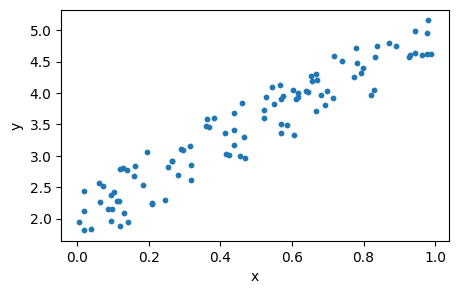

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + (np.random.rand(100, 1) - 0.5)

plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Предположим, что нам неизвестны параметры наклона и сдвига $w$ и $b$. Для их определения мы бы могли рассмотреть все возможные прямые вида $f(x) = w⋅x + b$ и выбрать среди семейства прямых такую, которая лучше всего приближает имеющиеся данные:

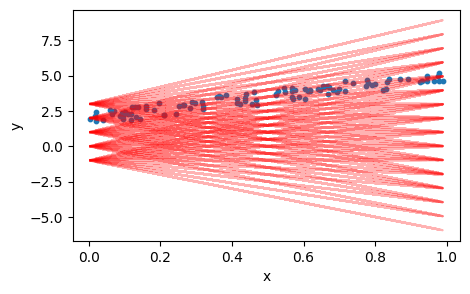

In [ ]:
plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=10)
for w in np.arange(-5.0, 7.0, 1):
    for b in [-1, 0, 1, 2, 3]:
        y_predicted = b + w * x
        plt.plot(x, y_predicted, color="r", alpha=0.3)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**Модель** $f(x) = w⋅x + b$ задаёт параметрическое семейство функций, а **выбор "правильного" представителя** из **параметрического семейства** и называется **обучением** модели:

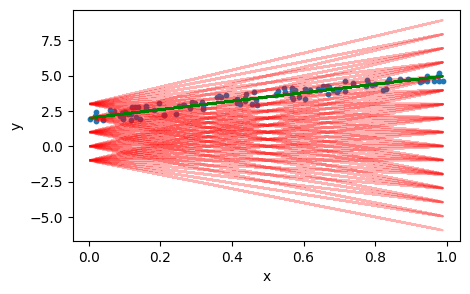

In [ ]:
plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=10)
for w in np.arange(-5.0, 7.0, 1):
    for b in [-1, 0, 1, 2, 3]:
        y_predicted = b + w * x
        plt.plot(x, y_predicted, color="r", alpha=0.3)
plt.plot(x, 2 + 3 * x, color="g")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Функция потерь

Как выбрать параметры?

**Функция потерь**  позволяет вычислить меру количества ошибок. Для задачи **регрессии** такой мерой может быть **расстояние** между предсказанным значением $f(х)$ и его фактическим значением. Распространенной функцией потерь является **средняя квадратичная ошибка** (MSE). Чтобы вычислить MSE, мы просто берем все значения ошибок, считаем квадраты их длин и усредняем.



То есть мы определяем ошибку модели на одном объекте как квадрат расстояния между предсказанием и истинным значением, а общая функция потерь будет задана выражением:

$$l_i =|y_i - f(x_i)| $$

$$ Loss = \sum l_i^2 = \frac{1}{N} \sum (y_i - f(x_i))^2$$

Для прямой с параметрами $w=4$, $b = 2$ и $w=3$, $b = 2$ (верные значения):

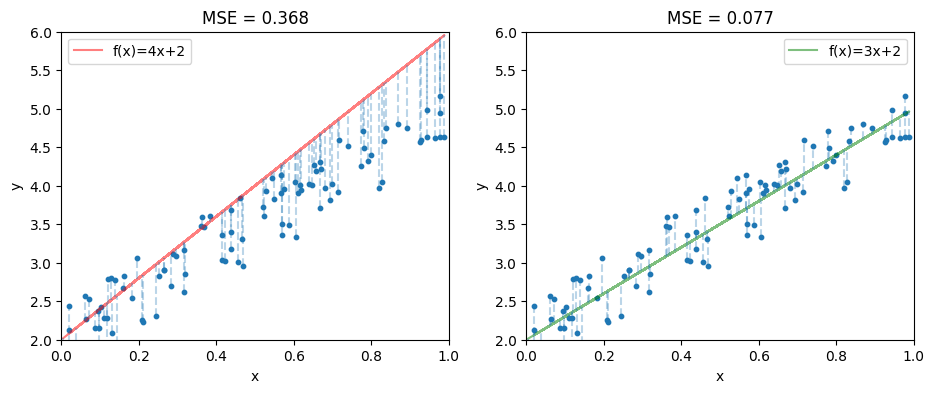

In [ ]:
def plot_delta_line(ax, x, y, w, b, color="r"):
    y_predicted = w * x + b
    # line
    ax.plot(x, y_predicted, color=color, alpha=0.5, label=f"f(x)={w}x+{b}")
    # delta
    for x_i, y_i, f_x in zip(x, y, y_predicted):
        ax.vlines(x=x_i, ymin=min(f_x, y_i), ymax=max(f_x, y_i), ls="--", alpha=0.3)
    # MSE
    loss = np.sum((y - (w * x + b)) ** 2) / (len(x))
    ax.set_title(f"MSE = {loss:.3f}")
    ax.legend()


fig, axs = plt.subplots(1, 2, figsize=(11, 4))

# plot x_i y_i (dots)
for ax in axs:
    ax.scatter(x, y, s=10)
    ax.set_xlim([0, 1])
    ax.set_ylim([2, 6])
    ax.set_xlabel("x")
    ax.set_ylabel("y")

plot_delta_line(axs[0], x, y, w=4, b=2, color="r")
plot_delta_line(axs[1], x, y, w=3, b=2, color="g")

plt.show()

Задача **поиска оптимальных параметров** модели сводится к задаче **поиска минимума функции потерь**.

## Поиск локального минимума

Посмотрим, как будет выглядеть ландшафт функции потерь для нашей задачи.

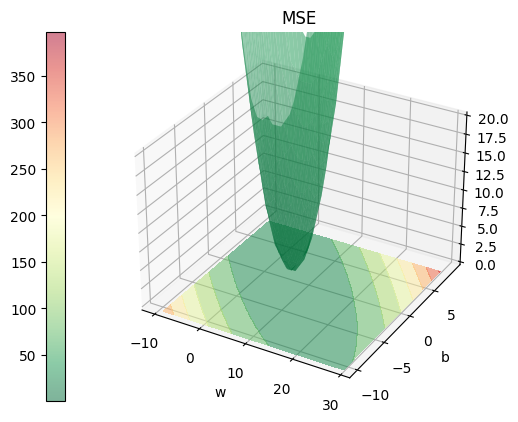

In [ ]:
w = np.arange(-10, 30, 1)
b = np.arange(-10, 10, 1)

w, b = np.meshgrid(w, b)

loss = np.zeros_like(w)
for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        loss[i, j] = np.sum((y - (w[i, j] * x + b[i, j])) ** 2) / (len(x))

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(w, b, loss, cmap=plt.cm.RdYlGn_r, alpha=0.5)

ax.contourf(w, b, loss, zdir="z", offset=-1, cmap="RdYlGn_r", alpha=0.5)
ax.set_zlim(0, 20)

ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_title("MSE")

fig.colorbar(surf, location="left")
plt.show()

Необходимым (но недостаточным) условием локального минимума дифференцируемой функции является равенство нулю частных производных:

$$	\begin{equation*}
 \begin{cases}
   \displaystyle\frac{\partial Loss}{\partial w}=0,
   \\
   \displaystyle\frac{\partial Loss}{\partial b}=0.
 \end{cases}
\end{equation*} $$

Т.к. MSE для линейной регрессии — полином второй степени относительно $w$ и $b$, а полином второй степени не может иметь больше одного экстремума, то локальный минимум будет глобальным.

##  Метод наименьших квадратов

Реализуем простейшую модель линейной регрессии с использованием библиотеки NumPy на датасете, определённом выше.

Используем метод наименьших квадратов: [МНК, простейшие частные случаи 📚[wiki]](https://ru.wikipedia.org/wiki/Метод_наименьших_квадратов#Простейшие_частные_случаи).

$$w = \frac{n\sum_{i=1}^nx_iy_i - (\sum_{i=1}^nx_i)(\sum_{i=1}^ny_i)}{n\sum_{i=1}^nx_t^2 - (\sum_{i=1}^n x_t)^2};$$

$$b = \frac{\sum_{i=1}^ny_i - w(\sum_{i=1}^nx_i)}{n}.$$

По сути метод наименьших квадратов — это решение системы уравнений выше.

Estimated coefficients:
b = 2.058 
w = 2.937
Final equation: 
y = 2.937x +2.058


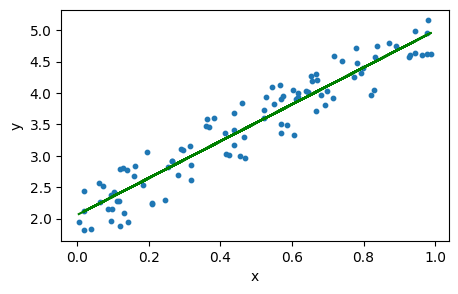

In [ ]:
def estimate_coef(x, y):
    n = len(x)
    w = (n * sum(np.multiply(x, y)) - sum(x) * sum(y)) / (
        n * sum(np.multiply(x, x)) - sum(x) ** 2
    )
    b = (sum(y) - w * sum(x)) / n
    return w, b


w, b = estimate_coef(x, y)

y_predicted = w * x + b

print(f"Estimated coefficients:\nb = {b[0]:.3f} \nw = {w[0]:.3f}")
print(f"Final equation: \ny = {w[0]:.3f}x +{b[0]:.3f}")

plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=10)
plt.plot(x, y_predicted, color="g")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Полученное решение близко к исходной  зависимости $y=3\cdot x + 2$.

Для многомерного случая МНК можно записать [решение 📚[book]](https://sun.tsu.ru/mminfo/2016/Dombrovski/book/chapter-3/chapter-3-2.htm) в матричном виде:  
$$\vec w = (X^TX)^{-1}X^T\vec y$$
где $\vec w$ — вектор параметров модели, включающий $b$ (при записи этого решения используется трюк “столбец единиц”, о котором мы поговорим чуть позже),
$X$ — матрица входных признаков (с единичным столбцом),
$\vec y$ — вектор предсказываемых значений.



## Метрики регрессии

С одной из метрик регрессии мы уже познакомились: это $MSE$, которую мы минимизировали в методе наименьших квадратов. Стоит отметить что $MSE$ имеет [размерность 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8) квадрата размерности предсказываемого значения.

$$ MSE  = \frac{1}{N} \sum (y_i - f(x_i))^2$$

Чтобы получить оценку ошибки той же размерности, можно взять корень (root) от $MSE$. Это метрика $RMSE$:

$$ RMSE = \sqrt{\frac{1}{N} \sum (y_i - f(x_i))^2}$$

Или посчитать среднюю абсолютную ошибку $MAE$:

$$ MAE = \frac{1}{N} \sum |y_i - f(x_i)|$$

Существуют и более специфичные метрики, например $R^2$, которая принимает значения от $(-\inf, 1]$, где $1$  —  наилучший вариант. $R^2$  называется [коэффициентом детерминации 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8) и характеризуют долю дисперсии целевого значения, которую объясняет модель.

$$R^2 = 1 - \frac{MSE}{\sigma^2}=1 - \frac{\sum {(y_i-f(x_i))^2}}{\sum{(y_i-\bar{y})^2}},$$

$$\bar{y} = \frac{1}{N}\sum {y_i},$$

где $\sigma^2$ — дисперсия.



<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L02/linear_regression.png" width="600"></center>

<center><em>Когда $R^2$ около нуля, модель плохо объясняет данные</em></center>

<center><em>Source: <a href="https://xkcd.com/1725">https://xkcd.com/1725</a></em></center>

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def print_metrics(y_true, y_predicted):
    print(f"Mean squared error: {mean_squared_error(y_true, y_predicted):.3f}")
    print(
        "Root mean squared error: ",
        f"{mean_squared_error(y_true, y_predicted, squared=False):.3f}",
    )
    print(f"Mean absolute error: {mean_absolute_error(y_true, y_predicted):.3f}")
    print(f"R2 score: {r2_score(y_true, y_predicted):.3f}")


print_metrics(y, y_predicted)

Mean squared error: 0.076
Root mean squared error:  0.276
Mean absolute error: 0.237
R2 score: 0.904


Подробнее про метрики можно почитать [тут 📚[book]](https://academy.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii). Там же вы можете найти информацию об относительных ошибках, выражаемых в процентах.

## Модель линейной регрессии из библиотеки scikit-learn

Свою линейную регрессию мы написали, теперь изучим, как работать с моделью из Sklearn.

Рассмотрим следующую задачу. Пусть мы хотим построить модель предсказания успеваемости студента на основе информации о величине потраченного им на изучение материала количества времени в часах. Это пример простейшей задачи линейной регрессии.

Загрузим датасет [Students Score 🛠️[doc]](https://www.kaggle.com/datasets/shubham47/students-score-dataset-linear-regression). Датасет содержит два числовых значения — часы и результаты.

In [ ]:
import pandas as pd

dataset = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/student_scores.csv"
)
print(dataset.shape)
dataset.head()

(25, 2)


Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

Построим график зависимости одного от другого, а также отобразим распределения каждой из переменных

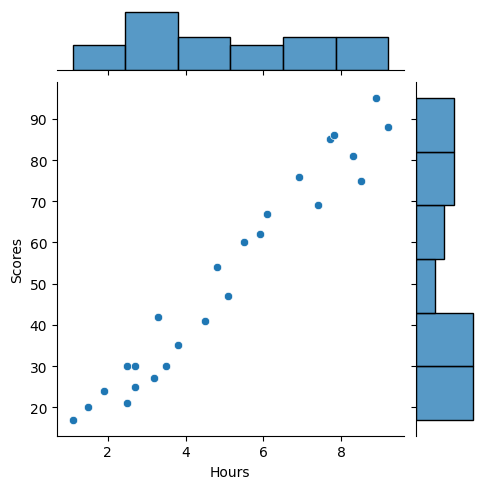

In [ ]:
import seaborn as sns

sns.jointplot(data=dataset, x="Hours", y="Scores", height=5)
plt.show()

Разделим наши данные на train и test

In [ ]:
from sklearn.model_selection import train_test_split

x = dataset.iloc[:, :-1].values  # column Hours
y = dataset.iloc[:, 1].values  # column Score

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

В случае сложного, многомодового распределения значений целевой переменной в задаче регрессии, может быть полезно задуматься о стратификации данных. Стратификация данных для задачи регрессии специфична и не реализована в Sklearn, о ней можно почитать в [Regression Analysis Based on Stratified Samples 🎓[article]](https://www.jstor.org/stable/2336525?seq=1), пример кода можно найти на [форуме ✏️[blog]](https://datascience.stackexchange.com/questions/33140/stratify-on-regression).

Теперь создадим модель для линейной регрессии. Чтобы не писать с нуля, воспользуемся готовой моделью из библиотеки Sklearn:

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

И обучим ее

In [ ]:
regressor.fit(x_train, y_train)

LinearRegression()

Посмотрим, что получилось

In [ ]:
x_train.shape

(20, 1)

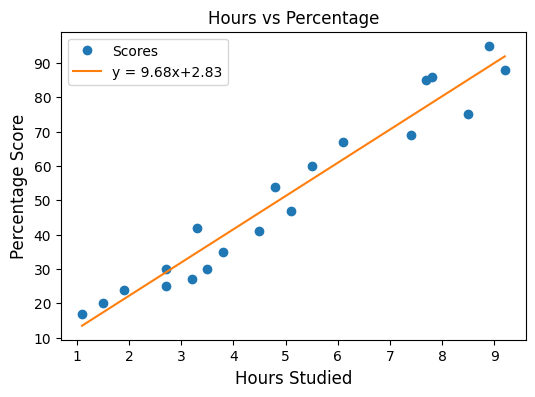

In [ ]:
x_points = np.linspace(min(x_train), max(x_train), 100)  # 100 dots at min to max
y_pred = regressor.predict(x_points)

plt.figure(figsize=(6, 4))
plt.plot(x_train, y_train, "o", label="Scores")
plt.plot(
    x_points,
    y_pred,
    label="y = %.2fx+%.2f" % (regressor.coef_[0], regressor.intercept_),
)
plt.title("Hours vs Percentage", size=12)
plt.xlabel("Hours Studied", size=12)
plt.ylabel("Percentage Score", size=12)
plt.legend()
plt.show()

Теперь сделаем предсказание для тестовой выборки

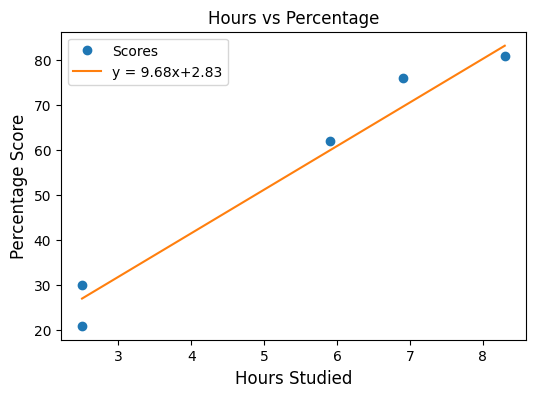

In [ ]:
y_pred = regressor.predict(x_test)

x_points = np.linspace(min(x_test), max(x_test), 100)
y_pred = regressor.predict(x_points)

plt.figure(figsize=(6, 4))
plt.plot(x_test, y_test, "o", label="Scores")
plt.plot(
    x_points,
    y_pred,
    label="y = %.2fx+%.2f" % (regressor.coef_[0], regressor.intercept_),
)
plt.title("Hours vs Percentage", size=12)
plt.xlabel("Hours Studied", size=12)
plt.ylabel("Percentage Score", size=12)
plt.legend()
plt.show()

Выглядит неплохо.

Посчитаем метрики для наших значений:

In [ ]:
y_pred = regressor.predict(x_test)
print_metrics(y_test, y_pred)

Mean squared error: 18.943
Root mean squared error:  4.352
Mean absolute error: 3.921
R2 score: 0.968


Будьте осторожнее: модели отражают только те закономерности, которые видели в данных. Вероятность того, что студент, потративший на подготовку 20 часов, получит больше максимального балла, мала.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L02/extrapolating.png" width="600"></center>

<center><em>Source: <a href="https://xkcd.com/605">https://xkcd.com/605</a></em></center>





# Метод градиентного спуска

Мы решали задачу линейной регрессии аналитически (МНК), но это не всегда возможно по нескольким причинам:
* Для аналитического решения нужно считать обратную матрицу, это вычислительно сложно и матрица бывает плохо определенной.
* Данных может быть слишком много для того, чтобы их можно было одновременно положить в память для расчета обратной матрицы.
* Модели могут быть слишком сложными для поиска аналитического решения. Более того, для сложных моделей ландшафт функции потерь может иметь сложный рельеф с несколькими локальными минимумами.

Давайте поговорим о том, что делать в таком случае.

## Градиент

Метод, который мы будем использовать, называется **“метод градиентного спуска”**. Для начала вспомним, что такое **градиент**. Возьмем функцию двух переменных:

$$\large f(x, y) = \sin(x\cdot y)$$

Она будет отличаться от функции потерь, которую мы визуализировали, тем, что у нее будет не один экстремум, а сложный рельеф. Рассчитаем ее на диапазоне значений от $0$ до $4$.

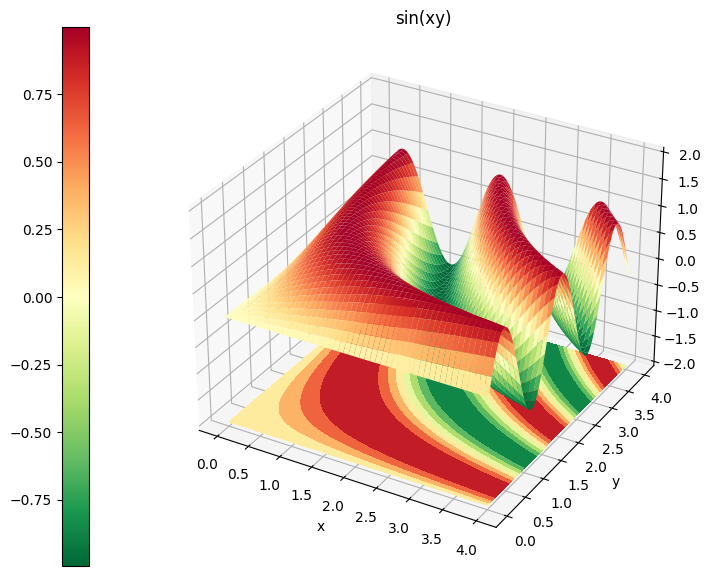

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x, y: np.sin(x * y)

x = np.linspace(0, 4, 1000)
y = np.linspace(0, 4, 1000)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

fig = plt.figure(figsize=(20, 7))


def show_3d(xx, yy, zz, fig):
    ax = fig.add_subplot(121, projection="3d")
    surf = ax.plot_surface(xx, yy, zz, cmap=plt.cm.RdYlGn_r)

    ax.contourf(xx, yy, zz, zdir="zz", offset=-2, cmap="RdYlGn_r")
    ax.set_zlim(-2, 2)

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("sin(xy)")
    fig.colorbar(surf, location="left")


show_3d(xx, yy, zz, fig)
plt.show()

Eсли $\varphi = \varphi(\vec{x})=\varphi(x_1 \dots x_n)$ — функция $n$ переменных, то её градиентом называется $n$-мерный вектор:
$$
\nabla \varphi(\vec{x})=
\begin{bmatrix}
\displaystyle\frac{\partial\varphi}{\partial x_1}\\
\displaystyle\frac{\partial\varphi}{\partial x_2}\\
...\\
\displaystyle\frac{\partial\varphi}{\partial x_n}\\
\end{bmatrix}
$$


Посчитаем градиент нашей функции $f(x, y)$. Для этого воспользуемся [**таблицей производных** 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%A2%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0_%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%BE%D0%B4%D0%BD%D1%8B%D1%85) и правилом вычисления [**производной сложной функции** 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D1%84%D1%84%D0%B5%D1%80%D0%B5%D0%BD%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%81%D0%BB%D0%BE%D0%B6%D0%BD%D0%BE%D0%B9_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8) (Chain-rule):
$$\frac {\partial f} {\partial x} = \frac {\partial f} {\partial t} \cdot \frac {\partial t} {\partial x}$$

Это правило очень нам пригодится в будущем.

$$\nabla f(x, y)=\begin{bmatrix}
\displaystyle\frac{\partial f}{\partial x}\\
\displaystyle\frac{\partial f}{\partial y}\\
\end{bmatrix}
=\begin{bmatrix}
\displaystyle\frac{\partial\sin(xy)}{\partial(xy)}\cdot\frac{\partial(xy)}{\partial x}\\
\displaystyle\frac{\partial\sin(xy)}{\partial(xy)}\cdot\frac{\partial(xy)}{\partial y}\\
\end{bmatrix}
= \begin{bmatrix}
\cos(xy)\cdot y\\
\cos(xy)\cdot x\\
\end{bmatrix}
$$

Посчитаем градиент на том же диапазоне (сетка реже, т.к. мы будем рисовать не точки, а стрелочки):

In [ ]:
gradf = lambda x, y: (np.cos(x * y) * y, np.cos(x * y) * x)

xsmall = np.linspace(0, 4, 15)
ysmall = np.linspace(0, 4, 15)
xxsmall, yysmall = np.meshgrid(xsmall, ysmall)
gradx, grady = gradf(xxsmall, yysmall)

Так как **значение градиента в точке** — это вектор, мы можем говорить о его **величине** и **направлении**. Так как значение градиента в точке — это вектор, мы можем говорить о его величине и направлении. Визуализируем наши расчеты: посмотрим на ландшафт функции $f(x, y)$ и направления градиентов.


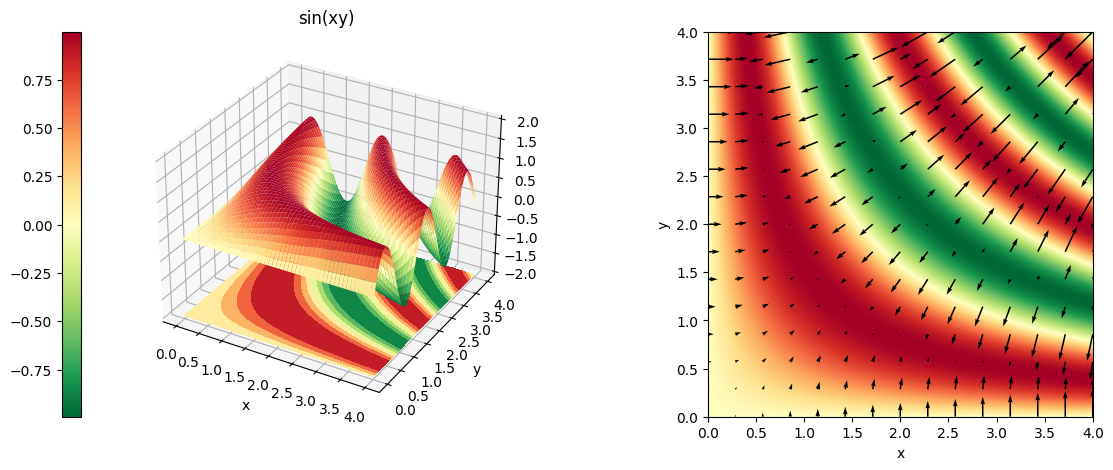

In [ ]:
fig = plt.figure(figsize=(15, 5))
show_3d(xx, yy, zz, fig)

ax = fig.add_subplot(122)
ax.imshow(
    zz,
    extent=(np.min(x), np.max(x), np.min(y), np.max(y)),
    cmap="RdYlGn_r",
    origin="lower",
)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.quiver(xxsmall, yysmall, gradx, grady)
plt.show()

На рисунке выше значения градиента в точке обозначены чёрными стрелочками. Можно заметить, что длина стрелок в  районе максимальных и минимальных значений функции **почти нулевая**, стрелки направлены в направлении возрастания значения функции, и наиболее длинные стрелки находятся в области наиболее резкого изменения значений функции.


Это проявление **свойств градиента**:
* Направление $\frac{\nabla f}{||\nabla f||}$ — сообщает нам направление максимального роста функции.

*  Величина $||\nabla f||$ — характеризует мгновенную скорость изменения значений функции.

## Идея градиентного спуска

Загрузим еще раз данные с зависимостью оценок студентов от времени подготовки.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/student_scores.csv"
)

x = dataset.iloc[:, :-1].values  # column Hours
y = dataset.iloc[:, 1].values  # column Score

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

Скачаем **код для интерактивной визуализации**. Он нужен только для объяснения и **не пригодится вам в работе**. Его разбирать мы не будем. Eсли интересно, можно изучить самостоятельно.

In [ ]:
# @title *Code for interactive visual
# source: https://github.com/TomasBeuzen/deep-learning-with-pytorch

!wget -qN https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L02/interactive_visualization.py

Для простоты рассмотрим одномерный случай. Будем подбирать только $w$, значение $b$ зафиксируем на уровне $2.83$. Визуализируем ошибку и значения $\displaystyle \frac{\partial Loss}{\partial w}$ для MSE Loss.

In [ ]:
from interactive_visualization import plot_grid_search
from sklearn.metrics import mean_squared_error


slopes = np.arange(5, 15, 0.5)
prediction = {f"{w}": w * x_train[:, 0] + 2.83 for w in slopes}
mse = np.array([mean_squared_error(y_train, w * x_train[:, 0] + 2.83) for w in slopes])
dmse_dw = np.array(
    [(2 * x_train[:, 0] * (w * x_train[:, 0] + 2.83 - y_train)).mean() for w in slopes]
)
plot_grid_search(x_train[:, 0], y_train, slopes, prediction, mse, dmse_dw)

 Видно, что оптимальное значение наклона соответствует минимуму MSE и нулю частной производной $\displaystyle\frac{\partial Loss}{\partial w}$. Аналогично будет, если мы возьмем в качестве Loss MAE.

In [ ]:
from sklearn.metrics import mean_absolute_error


slopes = np.arange(5, 15, 0.5)
prediction = {f"{w}": w * x_train[:, 0] + 2.83 for w in slopes}
mae = np.array([mean_absolute_error(y_train, w * x_train[:, 0] + 2.83) for w in slopes])
dmae_dw = np.array(
    [
        (x_train[:, 0] * np.sign(w * x_train[:, 0] + 2.83 - y_train)).mean()
        for w in slopes
    ]
)
plot_grid_search(x_train[:, 0], y_train, slopes, prediction, mae, dmae_dw)

Итого, т.к. градиент указывает направление наибольшего возрастания функции:

* если $\displaystyle\frac{\partial Loss}{\partial w} < 0$, то нам имеет смысл “идти” в сторону возрастания $\displaystyle\frac{\partial Loss}{\partial w}$;

* если $\displaystyle\frac{\partial Loss}{\partial w} > 0$ — в сторону убывания.

**Метод градиентного спуска** — итеративный метод, идея которого заключается в том, чтобы небольшими шажками “идти” в **обратную от градиента сторону**:

$$\large \vec w_{n+1} = \vec w_{n} - α \cdot \nabla_{\vec w_{n}} Loss,$$
где $α$ — скорость обучения.


Попробуем реализовать это в коде (для простоты только для $w$ при $b=2.83$).

In [ ]:
def gradient(x, y, w, b):
    return 2 * (x * (w * x + b - y)).mean()


def gradient_descent(x_train, y_train, x_test, y_test, w, alpha, b=2.83, iteration=10):
    """Gradient descent for optimizing slope in simple linear regression"""
    # history
    ws = [w]
    mse_train = [mean_squared_error(y_train, w * x_train + b)]
    dmse_train = []
    mse_test = [mean_squared_error(y_test, w * x_test + b)]
    prediction = {w: w * x_train + b}
    print(
        f"Iteration 0: w = {w:.2f}, Loss_train = {mse_train[0]:.2f}, "
        f"Loss_test = {mse_test[0]:.2f}."
    )
    for i in range(iteration):
        # adjust w based on gradient * learning rate
        grad = gradient(x_train, y_train, w, b)
        w -= alpha * grad  # adjust w based on gradient * learning rate
        # history
        ws.append(w)
        mse_train.append(mean_squared_error(y_train, w * x_train + b))
        dmse_train.append(grad)
        mse_test.append(mean_squared_error(y_test, w * x_test + b))
        prediction[w] = w * x_train + b
        print(
            f"Iteration {i+1}: w = {w:.2f}, Loss_train = {mse_train[i]:.2f}, "
            f"Loss_test = {mse_test[i]:3.2f}."
        )
    return ws, prediction, mse_train, dmse_train, mse_test

Обучим нашу модель:

In [ ]:
slopes, prediction, mse_train, dmse_train, mse_test = gradient_descent(
    x_train[:, 0], y_train, x_test[:, 0], y_test, w=5, alpha=0.01, iteration=7
)

Iteration 0: w = 5.00, Loss_train = 707.84, Loss_test = 793.54.
Iteration 1: w = 7.89, Loss_train = 707.84, Loss_test = 793.54.
Iteration 2: w = 9.00, Loss_train = 130.56, Loss_test = 145.80.
Iteration 3: w = 9.42, Loss_train = 45.98, Loss_test = 42.65.
Iteration 4: w = 9.58, Loss_train = 33.58, Loss_test = 24.38.
Iteration 5: w = 9.64, Loss_train = 31.77, Loss_test = 20.49.
Iteration 6: w = 9.67, Loss_train = 31.50, Loss_test = 19.46.
Iteration 7: w = 9.68, Loss_train = 31.46, Loss_test = 19.13.


Визуализируем процесс обучения:

In [ ]:
from interactive_visualization import plot_gradient_descent

plot_gradient_descent(x_train[:, 0], y_train, slopes, prediction, mse_train, dmse_train)

Видно, что за $7$ эпох мы получили то же значение $w$, что получали при использовании `LinearRegression`. При этом мы пришли в минимум $\text{MSE}$ и ноль градиента.


В реальности мы будем работать с функциями многих переменных, поэтому смотреть на сходимость по одной переменной — не самый оптимальный вариант. Более эффективно будет посмотреть на зависимость Loss от количества эпох для train и test.

In [ ]:
def plot_mse(mse_train, mse_test):
    plt.figure(figsize=(10, 4))
    plt.title("Learning curve")
    plt.plot(mse_train, label="train")
    plt.plot(mse_test, label="test")
    plt.legend()

    plt.xlabel("iterations", fontsize=12)
    plt.ylabel("MSE Loss", fontsize=12)

    plt.grid(True)
    plt.show()

Такие графики называют кривыми обучения. Посмотрим на кривые обучения при нашей скорости обучения $α=0.01$.

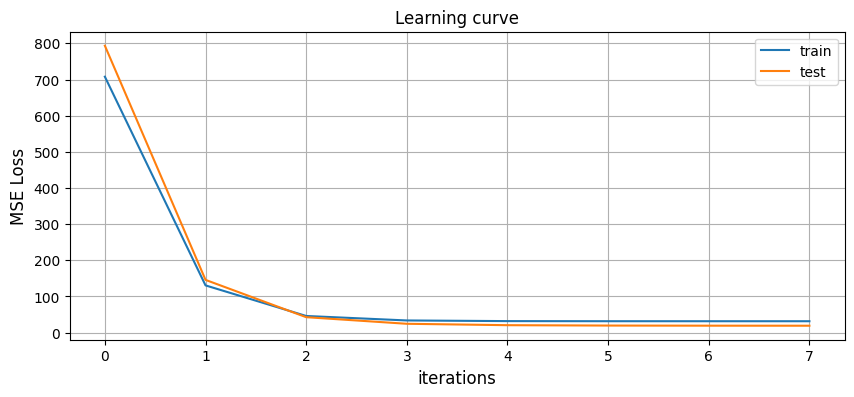

In [ ]:
plot_mse(mse_train, mse_test)

Видно, что **Loss падает** как на **train**, так и на **test** выборке. Также мы можем сказать, что **сеть обучалась**: train и test **графики вышли на плато**. При этом не произошло **переобучение**: ошибка на **test** выборке **не начала расти** (про переобучение поговорим позже).

В полученных графиках есть особенность, которая бросается в глаза опытному в обучении моделей человеку: **Loss на test выборке меньше, чем на train**. Это показатель того, что **с данными что-то не так**. Так бывает при утечке данных (об утечке данных вы подробнее узнаете в следующих лекциях), но в данном случае, test выборка просто слишком мала, чтобы отражать генеральную совокупность (всего 5 студентов, доверительный интервал для такого маленького количества объектов будет широкий).

## Выбор скорости обучения

**Скорость (шаг) обучения** — некоторый коэффициент, как правило, небольшой, который не позволяет нам двигаться слишком быстро. У нас есть точка, в которую мы хотим попасть. Если мы сделаем слишком большой шаг, то мы ее перескочим (график справа), поэтому надо подобрать шаг, который не позволит ее перескочить, но в то же время такой, чтобы тот же процесс не шел слишком медленно (как на графике слева).

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/learning_rate_optimal_value.png">

Посмотрим на скорость обучения на нашем примере. При **маленькой скорости обучения** мы будем очень медленно сходиться к минимуму.

In [ ]:
slopes, prediction, mse_train, dmse_train, mse_test = gradient_descent(
    x_train[:, 0], y_train, x_test[:, 0], y_test, w=5, alpha=0.0005, iteration=30
)

Iteration 0: w = 5.00, Loss_train = 707.84, Loss_test = 793.54.
Iteration 1: w = 5.14, Loss_train = 707.84, Loss_test = 793.54.
Iteration 2: w = 5.28, Loss_train = 666.74, Loss_test = 748.16.
Iteration 3: w = 5.42, Loss_train = 628.13, Loss_test = 705.49.
Iteration 4: w = 5.55, Loss_train = 591.87, Loss_test = 665.36.
Iteration 5: w = 5.68, Loss_train = 557.82, Loss_test = 627.61.
Iteration 6: w = 5.80, Loss_train = 525.83, Loss_test = 592.12.
Iteration 7: w = 5.92, Loss_train = 495.79, Loss_test = 558.73.
Iteration 8: w = 6.04, Loss_train = 467.57, Loss_test = 527.33.
Iteration 9: w = 6.15, Loss_train = 441.07, Loss_test = 497.79.
Iteration 10: w = 6.26, Loss_train = 416.17, Loss_test = 470.01.
Iteration 11: w = 6.37, Loss_train = 392.79, Loss_test = 443.88.
Iteration 12: w = 6.47, Loss_train = 370.84, Loss_test = 419.29.
Iteration 13: w = 6.57, Loss_train = 350.21, Loss_test = 396.16.
Iteration 14: w = 6.66, Loss_train = 330.84, Loss_test = 374.40.
Iteration 15: w = 6.76, Loss_train 

In [ ]:
plot_gradient_descent(x_train[:, 0], y_train, slopes, prediction, mse_train, dmse_train)

Спустя 30 итераций оранжевая прямая плохо отражает генеральную совокупность. Мы не достигли минимума MSE и нуля градиента.

Посмотрим, как выглядят кривые обучения:

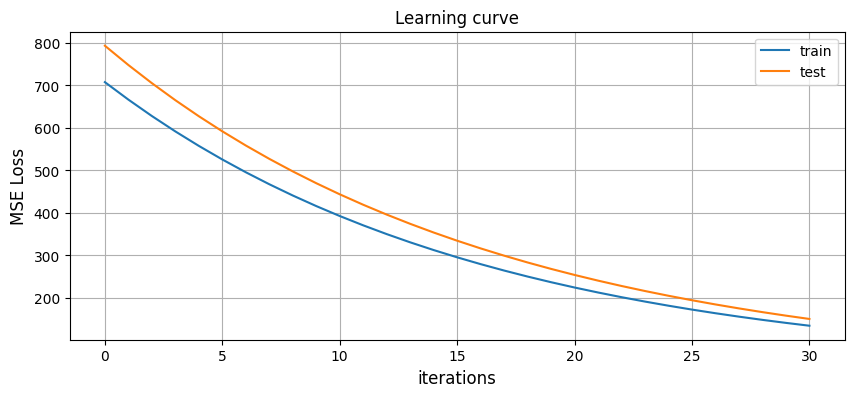

In [ ]:
plot_mse(mse_train, mse_test)

Модель недообучена — значения Loss не вышли на плато.

Посмотрим на **достаточно большую скорость обучения**.

In [ ]:
slopes, prediction, mse_train, dmse_train, mse_test = gradient_descent(
    x_train[:, 0], y_train, x_test[:, 0], y_test, w=5, alpha=0.027, iteration=15
)

Iteration 0: w = 5.00, Loss_train = 707.84, Loss_test = 793.54.
Iteration 1: w = 12.80, Loss_train = 707.84, Loss_test = 793.54.
Iteration 2: w = 7.60, Loss_train = 331.92, Loss_test = 300.22.
Iteration 3: w = 11.07, Loss_train = 164.92, Loss_test = 185.76.
Iteration 4: w = 8.76, Loss_train = 90.74, Loss_test = 65.14.
Iteration 5: w = 10.30, Loss_train = 57.79, Loss_test = 58.06.
Iteration 6: w = 9.27, Loss_train = 43.15, Loss_test = 23.93.
Iteration 7: w = 9.96, Loss_train = 36.65, Loss_test = 29.42.
Iteration 8: w = 9.50, Loss_train = 33.76, Loss_test = 18.09.
Iteration 9: w = 9.80, Loss_train = 32.48, Loss_test = 22.24.
Iteration 10: w = 9.60, Loss_train = 31.91, Loss_test = 17.96.
Iteration 11: w = 9.74, Loss_train = 31.66, Loss_test = 20.14.
Iteration 12: w = 9.65, Loss_train = 31.54, Loss_test = 18.39.
Iteration 13: w = 9.71, Loss_train = 31.49, Loss_test = 19.42.
Iteration 14: w = 9.67, Loss_train = 31.47, Loss_test = 18.67.
Iteration 15: w = 9.69, Loss_train = 31.46, Loss_test 

In [ ]:
plot_gradient_descent(x_train[:, 0], y_train, slopes, prediction, mse_train, dmse_train)

Шаг, получаемый умножением градиента на скорость обучения, получается достаточно большим, чтобы “перескочить” локальный минимум, но при этом модель все-таки попадает в него. Кривые обучения при этом успешно выходят на плато.

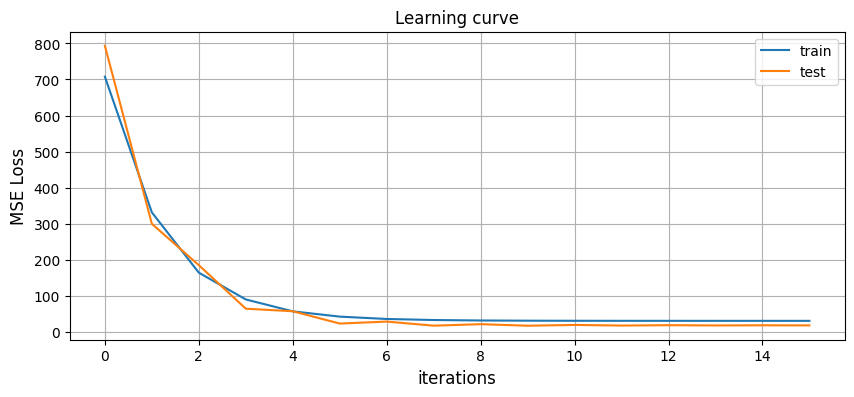

In [ ]:
plot_mse(mse_train, mse_test)

В финале посмотрим на **очень большую скорость обучения**.

In [ ]:
slopes, prediction, mse_train, dmse_train, mse_test = gradient_descent(
    x_train[:, 0],
    y_train,
    x_test[:, 0],
    y_test,
    w=5,
    alpha=0.034,
    iteration=5,
)

Iteration 0: w = 5.00, Loss_train = 707.84, Loss_test = 793.54.
Iteration 1: w = 14.82, Loss_train = 707.84, Loss_test = 793.54.
Iteration 2: w = 4.03, Loss_train = 847.72, Loss_test = 823.37.
Iteration 3: w = 15.89, Loss_train = 1016.53, Loss_test = 1132.95.
Iteration 4: w = 2.86, Loss_train = 1220.26, Loss_test = 1206.01.
Iteration 5: w = 17.17, Loss_train = 1466.11, Loss_test = 1624.33.


Шаг, который мы делаем, слишком большой. Мы не попадаем в локальный минимум.

In [ ]:
plot_gradient_descent(x_train[:, 0], y_train, slopes, prediction, mse_train, dmse_train)


По кривым обучения видно, что модель не сошлась: ошибка растет.


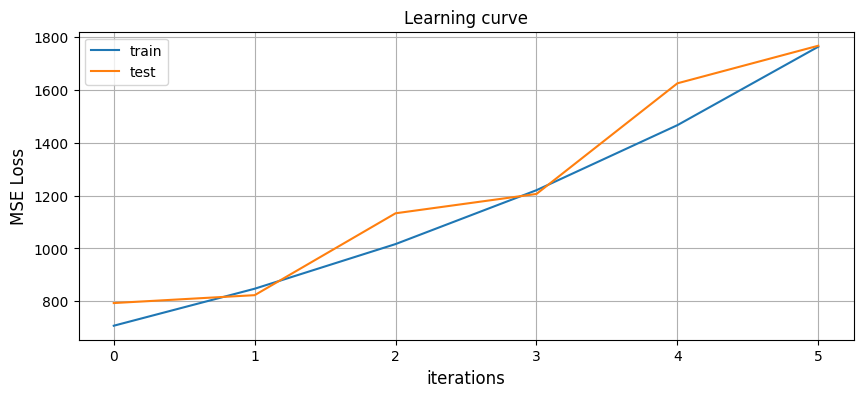

In [ ]:
plot_mse(mse_train, mse_test)

Выбор скорости обучения будет зависеть от модели и данных. В 7 лекции вы познакомитесь с различными модификациями метода градиентного спуска и узнаете больше о выборе скорости обучения, а пока ориентируйтесь на кривые обучения.

## Единый подход к учету смещения

Пока мы настраивали только одну переменную, но даже в случае предсказания оценки по времени подготовки у нас две переменные: вес $w$ и смещение $b$.

Когда признаков станет больше, у нас получится “лапша” из слагаемых:
$$y = b + w_1\cdot x_1 + w_2\cdot x_2 + w_3\cdot x_3 + w_4\cdot x_4 + w_5\cdot x_5 + ... + w_n\cdot x_n$$

Нам бы хотелось записать их компактно, чтобы не усложнять код и использовать один и тот же код для данных с разным количеством признаков.  Для этого мы будем использовать матричное перемножение и трюк **“столбец единиц”**, который реализует **единый подход к учету смещения**.

Обозначим вектор-столбец из настраиваемых параметров:
$$\vec w = \begin{bmatrix}
b \\ w \\
\end{bmatrix}$$


In [ ]:
w = np.array([[0.5], [5]])
w

array([[0.5],
       [5. ]])

К матрице (в нашем случае был только один признак, поэтому у нас будет вектор-столбец) признаков слева "дорисуем" столбец единиц:
$$X = \begin{bmatrix}
1 & X \\
\end{bmatrix} =
\begin{bmatrix}
1 & 2.7 \\
1 & 3.3 \\
... & ...\\
1 & 9.2 \\
\end{bmatrix}$$

**Предупреждение:** добавлять столбец единиц нужно, только если вы сами пишете модель. **Если вы пользуетесь готовыми моделями, в этом нет необходимости.**


In [ ]:
x_train = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))
x_test

array([[1. , 8.3],
       [1. , 2.5],
       [1. , 2.5],
       [1. , 6.9],
       [1. , 5.9]])

Матрицу $X$ можно матрично перемножить со столбцом $\vec w$, т.к количество столбцов $X$ совпадает с количеством строк в $\vec w$:

In [ ]:
x_train.shape, w.shape

((20, 2), (2, 1))

В общем случае:

$$\large \vec y = b + w_1\cdot x_1 + w_2\cdot x_2 + w_3\cdot x_3 + w_4\cdot x_4 + w_5\cdot x_5 + ... + w_n\cdot x_n = X\vec w $$  

Эту формулу можно свести к нескольким символам кода (`@` — матричное умножение):


In [ ]:
y_pred = x_test @ w
y_pred

array([[42.],
       [13.],
       [13.],
       [35.],
       [30.]])

## Необходимость нормализации

Реализуем многомерный градиентный спуск

In [ ]:
y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

In [ ]:
def gradient(x, y, w):
    """Gradient of mean squared error."""
    return 2 * (x.T @ (x @ w) - x.T @ y) / len(x)


def gradient_descent(x_train, y_train, x_test, y_test, w, alpha, iteration=10):
    """Gradient descent for optimizing slope in simple linear regression"""
    # history
    ws = np.zeros((iteration + 1, 2))
    ws[0] = w[:, 0]
    mse_train = [mean_squared_error(y_train, x_train @ w)]
    dmse_train = []
    mse_test = [mean_squared_error(y_test, x_test @ w)]
    prediction = {(w[0][0], w[1][0]): x_train @ w}

    print(
        f"Iteration 0: b = {w[0][0]:.2f}, w = {w[1][0]:.2f}, "
        f"Loss_train = {mse_train[0]:.2f}, "
        f"Loss_test = {mse_test[0]:.2f}."
    )

    for i in range(iteration):
        # adjust w based on gradient * learning rate
        grad = gradient(x_train, y_train, w)
        w -= alpha * grad  # adjust w based on gradient * learning rate
        # history
        ws[i + 1] = w[:, 0]
        mse_train.append(mean_squared_error(y_train, x_train @ w))
        dmse_train.append(grad)
        mse_test.append(mean_squared_error(y_test, x_test @ w))
        prediction[(w[0][0], w[1][0])] = x_train @ w

        print(
            f"Iteration {i+1}: b = {w[0][0]:.2f}, w = {w[1][0]:.2f}, "
            f"Loss_train = {mse_train[i]:.2f}, "
            f"Loss_test = {mse_test[i]:3.2f}."
        )
    return ws, prediction, mse_train, dmse_train, mse_test

Попробуем обучить модель:

In [ ]:
w = np.array([[0.5], [5]])
ws, prediction, mse_train, dmse_train, mse_test = gradient_descent(
    x_train,
    y_train,
    x_test,
    y_test,
    w,
    0.01,
)

Iteration 0: b = 0.50, w = 5.00, Loss_train = 821.48, Loss_test = 915.80.
Iteration 1: b = 1.01, w = 8.12, Loss_train = 821.48, Loss_test = 915.80.
Iteration 2: b = 1.20, w = 9.26, Loss_train = 138.11, Loss_test = 152.87.
Iteration 3: b = 1.28, w = 9.68, Loss_train = 46.20, Loss_test = 41.48.
Iteration 4: b = 1.31, w = 9.84, Loss_train = 33.84, Loss_test = 23.27.
Iteration 5: b = 1.32, w = 9.89, Loss_train = 32.17, Loss_test = 19.64.
Iteration 6: b = 1.33, w = 9.91, Loss_train = 31.95, Loss_test = 18.72.
Iteration 7: b = 1.34, w = 9.92, Loss_train = 31.91, Loss_test = 18.44.
Iteration 8: b = 1.34, w = 9.92, Loss_train = 31.90, Loss_test = 18.35.
Iteration 9: b = 1.35, w = 9.92, Loss_train = 31.90, Loss_test = 18.31.
Iteration 10: b = 1.36, w = 9.92, Loss_train = 31.90, Loss_test = 18.30.


Мы не дошли до оптимальной прямой $y = 9.68x+2.83$, которую вычисляли выше.

При этом график Loss выглядит неплохо:

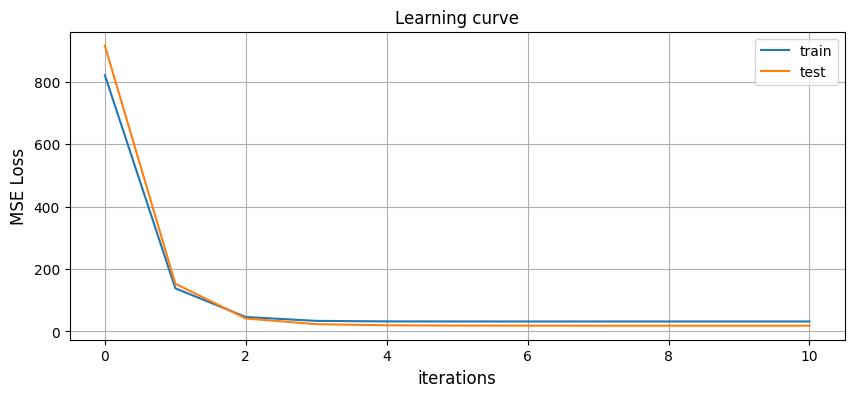

In [ ]:
plot_mse(mse_train, mse_test)

Такое поведение связано с ландшафтом функции потерь: значение ошибки по оси $b$ изменяется намного медленнее, чем по оси $w$.

In [ ]:
from interactive_visualization import plot_grid_search_2d

intercepts = np.arange(-7.5, 12.5, 0.1)  # b
slopes = np.arange(5, 15, 0.1)  # w
plot_grid_search_2d(x_train[:, 1], y_train, slopes, intercepts)

Поэтому основное изменение значений происходит вдоль оси $w$, а $b$ меняется слабо (значение $b$ далеко от ожидаемого).

In [ ]:
from interactive_visualization import plot_gradient_descent_2d

plot_gradient_descent_2d(
    x_train[:, 1],
    y_train[:, 0],
    ws,
    slopes,
    intercepts,
)

Чтобы исправить ситуацию, применим `StandardScaler`:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(np.expand_dims(x_train[:, 1], axis=1)).flatten()
x_test_scaled = scaler.transform(np.expand_dims(x_test[:, 1], axis=1)).flatten()

In [ ]:
intercepts = np.arange(40, 60, 0.1)  # b
slopes = np.arange(15, 35, 0.1)  # w

plot_grid_search_2d(x_train_scaled, y_train, slopes, intercepts)

In [ ]:
x_train_scaled = np.hstack(
    (np.ones((len(x_train_scaled), 1)), np.expand_dims(x_train_scaled, axis=1)),
)

x_test_scaled = np.hstack(
    (np.ones((len(x_test_scaled), 1)), np.expand_dims(x_test_scaled, axis=1)),
)

Т.к. диапазоны x изменились, значения $w$ и $b$ тоже изменятся.


In [ ]:
w = np.array([[57.0], [33.0]])
ws, prediction, mse_train, dmse_train, mse_test = gradient_descent(
    x_train_scaled, y_train, x_test_scaled, y_test, w, 0.35, iteration=10
)

Iteration 0: b = 57.00, w = 33.00, Loss_train = 146.31, Loss_test = 108.53.
Iteration 1: b = 52.70, w = 26.86, Loss_train = 146.31, Loss_test = 108.53.
Iteration 2: b = 51.40, w = 25.01, Loss_train = 41.79, Loss_test = 21.10.
Iteration 3: b = 51.02, w = 24.46, Loss_train = 32.39, Loss_test = 17.36.
Iteration 4: b = 50.90, w = 24.29, Loss_train = 31.54, Loss_test = 18.27.
Iteration 5: b = 50.86, w = 24.24, Loss_train = 31.46, Loss_test = 18.72.
Iteration 6: b = 50.85, w = 24.23, Loss_train = 31.46, Loss_test = 18.88.
Iteration 7: b = 50.85, w = 24.23, Loss_train = 31.45, Loss_test = 18.92.
Iteration 8: b = 50.85, w = 24.22, Loss_train = 31.45, Loss_test = 18.94.
Iteration 9: b = 50.85, w = 24.22, Loss_train = 31.45, Loss_test = 18.94.
Iteration 10: b = 50.85, w = 24.22, Loss_train = 31.45, Loss_test = 18.94.


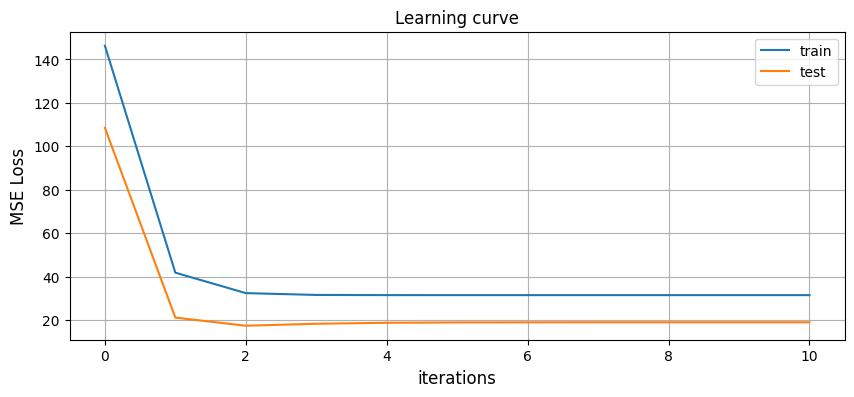

In [ ]:
plot_mse(mse_train, mse_test)

Проверим, что после нормализации мы сходимся к $y = 9.68x + 2.83$.  Для этого используем данные о матожидании и дисперсии из `StandardScaler`.

In [ ]:
b = ws[-1][0] - ws[-1][1] * scaler.mean_ / (scaler.var_) ** 0.5
w = ws[-1][1] / (scaler.var_) ** 0.5

print(f"y = {w[0]:.2f}x + {b[0]:.2f}")

y = 9.68x + 2.83


По визуализации видно, что $w$ и $b$ изменяются во время обучения.

In [ ]:
plot_gradient_descent_2d(
    x_train_scaled[:, 1],
    y_train[:, 0],
    ws,
    slopes,
    intercepts,
)

## Cтохастический градиентный спуск

[[blog] ✏️ Пост о стохастическом градиентом спуске](https://www.tomasbeuzen.com/deep-learning-with-pytorch/chapters/chapter2_stochastic-gradient-descent.html#motivation-for-stochastic-gradient-descent)

До этого мы обучали модель, рассчитывая градиент по **всей train выборке**. Это не всегда возможно:
- данных может быть слишком много, чтобы загрузить их в память одновременно и рассчитать градиент,
- мы можем хотеть дообучать модель на свежепришедших данных, которых может быть немного.


Поэтому появляется идея **стохастического градиентного спуска**: мы можем делать шаг обучения, рассчитывая градиент не по всей выборке (**batch**), а по нескольким случайно выбранным объектам (**mini-batch**) или даже по одному случайно выбранному объекту (**stochastic**).

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/define_size_of_batch.png" width="500"></center>

Можно [показать 📚[book]](https://academy.yandex.ru/handbook/ml/article/shodimost-sgd), что **стохастический** (с размером $\text{batch}=1$) **градиентный спуск сходится к минимуму (глобальному или локальному) функции потерь** с конечной точностью. Важным условием является **стохастичность**. Если мы будем использовать одну и ту же последовательность выборок, это приведет к накоплению ошибки и смещению результата.

Добавим создание подвыборки к нашему алгоритму:

In [ ]:
def stochastic_gradient_descent(
    x_train,
    y_train,
    x_test,
    y_test,
    w,
    alpha,
    iteration=10,
    batch_size=None,
):
    """Gradient descent for optimizing slope in simple linear regression"""
    # history
    ws = np.zeros((iteration + 1, 2))
    ws[0] = w[:, 0]
    mse_train = [mean_squared_error(y_train, x_train @ w)]
    dmse_train = []
    mse_test = [mean_squared_error(y_test, x_test @ w)]
    prediction = {(w[0][0], w[1][0]): x_train @ w}

    print(
        f"Iteration 0: b = {w[0][0]:.2f}, w = {w[1][0]:.2f}, "
        f"Loss_train = {mse_train[0]:.2f}, "
        f"Loss_test = {mse_test[0]:.2f}."
    )

    for i in range(iteration):
        if not batch_size:
            x_sample = x_train
            y_sample = y_train
        else:
            indxs = np.random.choice(x_train.shape[0], batch_size)
            x_sample = x_train[indxs, :]
            y_sample = y_train[indxs, :]

        # adjust w based on gradient * learning rate
        grad = gradient(x_sample, y_sample, w)
        w -= alpha * grad  # adjust w based on gradient * learning rate
        # history
        ws[i + 1] = w[:, 0]
        mse_train.append(mean_squared_error(y_train, x_train @ w))
        dmse_train.append(grad)
        mse_test.append(mean_squared_error(y_test, x_test @ w))
        prediction[(w[0][0], w[1][0])] = x_train @ w
        if (i + 1) % 10 == 0:
            print(
                f"Iteration {i+1}: b = {w[0][0]:.2f}, w = {w[1][0]:.2f}, "
                f"Loss_train = {mse_train[i]:.2f}, "
                f"Loss_test = {mse_test[i]:3.2f}."
            )
    return ws, prediction, mse_train, dmse_train, mse_test

Чтобы сравнить результаты, будем использовать одни и те же количество итераций и скорость обучения. Чтобы компенсировать стохастичность, возьмем маленькое значение $\alpha$ и $100$ итераций.

Для всего train сета мы посчитаем градиент для $20\cdot100 = 2000$ точек.

In [ ]:
w = np.array([[57.0], [33.0]])
ws, prediction, mse_train, dmse_train, mse_test = stochastic_gradient_descent(
    x_train_scaled,
    y_train,
    x_test_scaled,
    y_test,
    w,
    0.02,
    iteration=100,
    batch_size=None,
)

f1 = plot_gradient_descent_2d(
    x_train_scaled[:, 1],
    y_train[:, 0],
    ws,
    slopes,
    intercepts,
    mode="lines",
    title="Batch gradient descent",
)

Iteration 0: b = 57.00, w = 33.00, Loss_train = 146.31, Loss_test = 108.53.
Iteration 10: b = 54.94, w = 30.06, Loss_train = 86.54, Loss_test = 55.92.
Iteration 20: b = 53.57, w = 28.10, Loss_train = 55.80, Loss_test = 30.94.
Iteration 30: b = 52.66, w = 26.80, Loss_train = 42.22, Loss_test = 21.36.
Iteration 40: b = 52.05, w = 25.94, Loss_train = 36.21, Loss_test = 18.09.
Iteration 50: b = 51.65, w = 25.36, Loss_train = 33.56, Loss_test = 17.29.
Iteration 60: b = 51.38, w = 24.98, Loss_train = 32.38, Loss_test = 17.36.
Iteration 70: b = 51.20, w = 24.73, Loss_train = 31.87, Loss_test = 17.68.
Iteration 80: b = 51.08, w = 24.56, Loss_train = 31.64, Loss_test = 18.01.
Iteration 90: b = 51.01, w = 24.45, Loss_train = 31.54, Loss_test = 18.28.
Iteration 100: b = 50.95, w = 24.37, Loss_train = 31.49, Loss_test = 18.49.


Для стохастического градиентного спуска (размер $\text{batch}=1$) мы посчитаем градиент для $1\cdot100 = 100$ точек.

In [ ]:
np.random.seed(42)
w = np.array([[57.0], [33.0]])
ws_stohastic, prediction, mse_train, dmse_train, mse_test = stochastic_gradient_descent(
    x_train_scaled,
    y_train,
    x_test_scaled,
    y_test,
    w,
    0.02,
    iteration=100,
    batch_size=1,
)
f2 = plot_gradient_descent_2d(
    x_train_scaled[:, 1],
    y_train[:, 0],
    ws_stohastic,
    slopes,
    intercepts,
    mode="lines",
    title="Stochastic gradient descent",
)

Iteration 0: b = 57.00, w = 33.00, Loss_train = 146.31, Loss_test = 108.53.
Iteration 10: b = 54.17, w = 29.83, Loss_train = 74.29, Loss_test = 45.31.
Iteration 20: b = 54.43, w = 28.49, Loss_train = 62.91, Loss_test = 37.09.
Iteration 30: b = 52.67, w = 26.34, Loss_train = 42.71, Loss_test = 22.04.
Iteration 40: b = 51.48, w = 23.96, Loss_train = 32.13, Loss_test = 18.45.
Iteration 50: b = 52.13, w = 25.01, Loss_train = 33.79, Loss_test = 17.58.
Iteration 60: b = 51.83, w = 25.15, Loss_train = 33.67, Loss_test = 17.93.
Iteration 70: b = 52.79, w = 25.67, Loss_train = 37.54, Loss_test = 19.11.
Iteration 80: b = 51.72, w = 24.74, Loss_train = 32.47, Loss_test = 17.52.
Iteration 90: b = 51.25, w = 25.29, Loss_train = 32.72, Loss_test = 17.30.
Iteration 100: b = 50.82, w = 24.18, Loss_train = 31.49, Loss_test = 18.89.


Для стохастического спуска с $\text{mini-batch}=5$ мы посчитаем градиент для $5\cdot100=500$ точек.

In [ ]:
np.random.seed(42)
w = np.array([[57.0], [33.0]])
(
    ws_mini_batch,
    prediction,
    mse_train,
    dmse_train,
    mse_test,
) = stochastic_gradient_descent(
    x_train_scaled,
    y_train,
    x_test_scaled,
    y_test,
    w,
    0.02,
    iteration=100,
    batch_size=5,
)
f3 = plot_gradient_descent_2d(
    x_train_scaled[:, 1],
    y_train[:, 0],
    ws_mini_batch,
    slopes,
    intercepts,
    mode="lines",
    title="Mini-batch gradient descent",
)

Iteration 0: b = 57.00, w = 33.00, Loss_train = 146.31, Loss_test = 108.53.
Iteration 10: b = 54.89, w = 29.67, Loss_train = 79.49, Loss_test = 50.29.
Iteration 20: b = 53.54, w = 27.93, Loss_train = 52.77, Loss_test = 28.57.
Iteration 30: b = 52.28, w = 26.91, Loss_train = 42.28, Loss_test = 21.22.
Iteration 40: b = 51.72, w = 25.83, Loss_train = 35.69, Loss_test = 17.80.
Iteration 50: b = 51.10, w = 24.92, Loss_train = 32.10, Loss_test = 17.53.
Iteration 60: b = 50.84, w = 24.91, Loss_train = 32.06, Loss_test = 17.59.
Iteration 70: b = 51.04, w = 24.98, Loss_train = 32.12, Loss_test = 17.46.
Iteration 80: b = 51.28, w = 24.72, Loss_train = 31.93, Loss_test = 17.63.
Iteration 90: b = 51.03, w = 24.41, Loss_train = 31.56, Loss_test = 18.33.
Iteration 100: b = 50.85, w = 23.98, Loss_train = 31.48, Loss_test = 19.36.


Мы ищем минимум для всех данных.
- Градиент, рассчитанный по одному объекту, будет специфичен. Трек обучения  в случае стохастического градиентного спуска будет запутанным, а итоговая ошибка будет расти с увеличением скорости обучения (мы взяли низкую скорость).
- Градиент, рассчитанный по нескольким объектам будет давать лучшую оценку градиента для всех данных. Трек будет менее сложным.
- Градиент, рассчитанный по всей выборке, будет давать наиболее точное направление.

In [ ]:
from interactive_visualization import plot_panel

plot_panel(f1, f2, f3)

Для **ускорения расчетов** рекомендовано использовать **максимальный размер mini-batch**, который помещается в память, но это не всегда дает лучший результат. На 7 лекции вы увидите, что для сложных моделей стохастичность, связанная с небольшим размером батча, может помочь выбраться из локального минимума и найти более глубокий.


# Классификация

## Hinge loss

Теперь попробуем разобраться, что делать в случае классификации.

Рассмотрим задачу классификации на два класса. Например, у нас есть данные о лабораторных мышах. Часть из них имеет нормальную массу тела, а часть — мыши с ожирением.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/svm_mouse_example.png" width="800">

Итак:
1. У нас есть набор данных из $N$ объектов (мышей).
2. Для каждого из объектов (мышей) нам известно признаковое описание объекта в виде набора вещественных чисел (вес, длина от носа до кончика хвоста, возраст и т.д.). То есть объекту под номером $i$ соответствует вектор $\vec x_i$.
3. Также для каждого объекта нам известна истинная метка класса. Мы знаем, что объекту с признаковым описанием $\vec x_i$ соответствует метка класса $y_i$. Будем считать, что метки классов принимают значения:
$$y_i =
\begin{cases}
    +1, & \text{для пухляшей}, \\
    -1, & \text{для всех остальных}.
\end{cases}$$.


В задаче регрессии мы использовали метрику $MSE$ в качестве функции потерь. Здесь мы можем сделать что-то подобное.

Мы можем ввести пороговое решающее правило: определять метку класса по знаку линейной функции (случай $x = 0$ можем отнести к любому классу):

$$\large y_i^{pred} = sign(\vec{w}\vec{x}_i+b)$$

где $sign$ — сигнум-функция (функция знака).

$$sign(x) =
\begin{cases}
    +1, & x>0, \\
    0 & x=0,\\
    -1, & x<0.
\end{cases}$$

Используя такое решающее правило, мы можем посчитать метрику $accuracy$:

$$\large accuracy=\frac{\sum_{i=1}^N [sign(\vec{w}\vec{x}_i+b)==y_i]}{N}$$


Нам нужно максимизировать $accuracy$, а значит минимизировать $1-accuracy$. Действуя по аналогии с задачей регрессии, мы могли бы задать функцию потерь следующим образом:
$$\large Loss = 1-accuracy =  \frac{\sum_{i=1}^N \overline{[sign(\vec{w}\vec{x}_i+b)==y_i]}}{N} = \frac{\sum_{i=1}^N l_i}{N}$$

$$\large l_i = \overline{[sign(\vec{w}\vec{x}_i+b)==y_i]}$$

Функция $l_i$ будет представлять собой ступеньку (1 — там, где мы ошиблись, и 0 — где класс определен правильно). Это плохо, т.к производная такой функции будет равна нулю почти везде, а это значит, что у нас будут проблемы с поиском минимума.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/hinge_loss.png" width="900">

Мы можем модифицировать функцию потерь, задав оценку сверху для $l_i$, полученного из $accuracy$:

$$\large l_i = \max(0, 1 - y_i ((\vec w, \vec x_i) + b ))$$

Данная модификация входит в [Hinge loss 📚[wiki]](https://en.wikipedia.org/wiki/Hinge_loss):
$$\large Loss = \frac{1}{2}||w||^2 + C\frac{\sum_{i=1}^N l_i}{N} $$

где $C$ — обратный коэффициент регуляризации, гиперпараметр, значение по умолчанию в Sklearn: `C=1.0`.

Пока не очень понятно, почему появился член с $w^2$, но он очень важен. Чтобы понять его назначение, рассмотрим задачу геометрически.

##1D классификация

Рассмотрим **одномерный пример**. У нас есть данные только по **массе мышей**. Часть из них определена как мыши с нормальной массой тела, а часть — как мыши с ожирением.

Чтобы их отделить друг от друга, нам достаточно одного критерия. Мы можем посмотреть на график и визуально определить предельную массу, после которой мыши считаются мышами с ожирением.

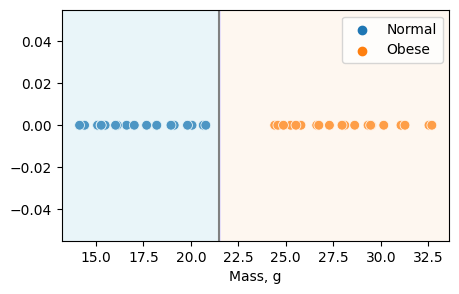

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#B8E1EC", "#bea6ff", "#FEE7D0"])


def generate_data(total_len=40):
    x = np.hstack(
        [
            np.random.uniform(14, 21, total_len // 2),
            np.random.uniform(24, 33, total_len // 2),
        ]
    )
    y = np.hstack([np.zeros(total_len // 2), np.ones(total_len // 2)])
    return x, y


def plot_data_1d(
    x,
    y,
    total_len=40,
    s=50,
    threshold=None,
    margin=None,
    legend=["Normal", "Obese"],
    marker="o",
):
    ax = sns.scatterplot(x=x, y=np.zeros(len(x)), hue=y, s=s, marker=marker)
    if threshold:
        x_lim, y_lim = ax.get_xlim(), ax.get_ylim()
        XX, YY = np.meshgrid(
            np.linspace(x_lim[0], x_lim[1], 100), np.linspace(y_lim[0], y_lim[1], 100)
        )
        pred = np.sign(XX - threshold)
        plt.contourf(XX, YY, pred, alpha=0.3, cmap=custom_cmap)
        ax.axvline(threshold, color="grey")
    if margin:
        for line in margin:
            ax.axvline(line, color="grey", ls="dashed")
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, legend)
    ax.set(xlabel="Mass, g")
    return ax


total_len = 40
np.random.seed(42)
x, y = generate_data(total_len=total_len)
plt.figure(figsize=(5, 3))
ax = plot_data_1d(x, y, threshold=21.5, total_len=total_len)

Теперь, пользуясь нашим простым критерием, попробуем классифицировать каких-то новых (тестовых) мышей $\color{orange}{✭}$ $\color{blue}{✭}$:

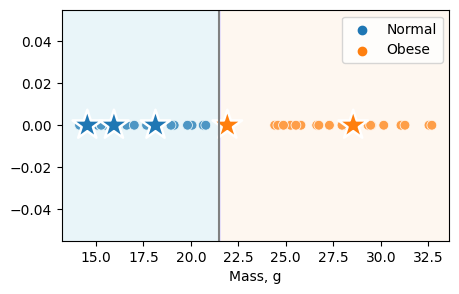

In [ ]:
x_test = np.random.uniform(14, 30, 5)


def classify(x, threshold=21.5):
    y = np.zeros_like(x)
    y[x > threshold] = 1
    return y


total_len = 40
threshold = 21.5

plt.figure(figsize=(5, 3))
ax = plot_data_1d(x, y, threshold=threshold, total_len=total_len)
ax = plot_data_1d(
    x_test, classify(x_test, threshold), total_len=total_len, s=500, marker="*"
)

Одна из тестовых мышей была классифицирована как мышь с ожирением ($\color{orange}{✭}$ на границе), хотя она ближе по массе к мышам без ожирения из обучающей выборки $\color{blue}{●}$. Не порядок!

## Maximum Margin Classifier

Вооружившись этим новым знанием, попробуем классифицировать наших мышек по-умному. Возьмем крайние точки в каждом кластере. И в качестве порогового значения будем использовать среднее между ними.

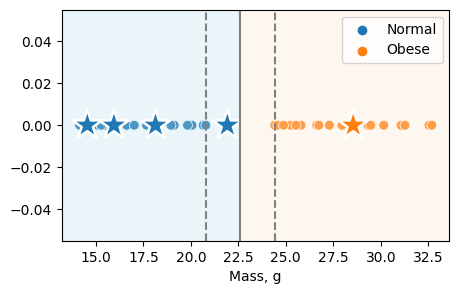

In [ ]:
normal_limit = x[y == 0].max()  # extreme point for 'normal'
obese_limit = x[y == 1].min()  # extreme point for 'obese'

threshold = np.mean([normal_limit, obese_limit])  # separated with mean value

plt.figure(figsize=(5, 3))
ax = plot_data_1d(
    x, y, total_len=total_len, threshold=threshold, margin=[normal_limit, obese_limit]
)
ax = plot_data_1d(
    x_test,
    classify(x_test, threshold=threshold),
    total_len=total_len,
    s=500,
    marker="*",
)

Мы можем посчитать, насколько наша мышь близка к тому, чтобы оказаться в другом классе. Такое расстояние называется **margin**. И оно считается как $\mathrm{margin} = |\mathrm{threshold} - \mathrm{observation}|$.

In [ ]:
margins = np.abs(x_test - threshold)
print(margins)

[6.65109958 0.68088078 8.053495   5.94541509 4.46323163]


Соответственно, если мы посчитаем margins для наших крайних точек `normal_limit` и `obese_limit`, мы найдем самое большое возможное значение margin для нашего классификатора:

In [ ]:
margin_0 = np.abs(normal_limit - threshold)
margin_1 = np.abs(obese_limit - threshold)
print(margin_0, margin_1)

1.8143423746730107 1.8143423746730072


Такой классификатор мы называем **Maximum Margin Classifier**. Он хорошо работает в случае, когда классы не пересекаются.

## 2D классификация

Теперь рассмотрим пример, где мы измерили не только вес мышей, но и их длину от хвоста до носа. Теперь не очевидно, какие точки кластеров у нас являются крайними и как провести разделяющую прямую, чтобы классы были максимально разнесены.

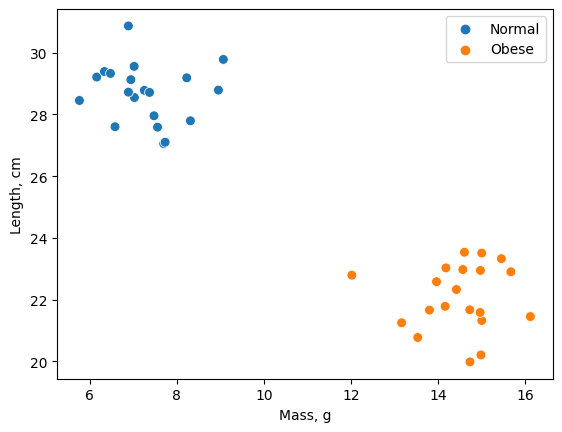

In [ ]:
from sklearn.datasets import make_blobs


def generate_2d_data(total_len=40):
    x, y = make_blobs(n_samples=total_len, centers=2, random_state=42)
    x[:, 0] += 10
    x[:, 1] += 20
    return x, y


total_len = 40
x, y = generate_2d_data(total_len=total_len)

fig = plt.figure()
ax = sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, s=50)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Normal", "Obese"])
ax.set(xlabel="Mass, g", ylabel="Length, cm")
plt.show()

## SVM: Hard and Soft Margin Classifier

Попробуем подойти к задаче с другой стороны (мы немного упростили визуализацию для удобства восприятия, но с мышками будет так же).

Мы хотим провести разделяющую гиперплоскость таким образом, чтобы:
1. Плюсы и минусы лежали по разные стороны от этой плоскости.
2. Ближайшие к плоскости объекты были от нее как можно дальше.

Второе условие дает нам максимальный зазор (*margin*), который мы тривиально находили в одномерном случае.


<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/svm_hard_margin.png" width="1000">

Гиперплоскость однозначно задается вектором нормали $\vec w$ и смещением $b$. Мы ищем решение в виде $(\vec w, \vec x) + b$, где $(\vec w, \vec x)$ — это скалярное произведение, $\vec w$ — вектор весов, а $b$ — смещение. Скалярное произведение вектора признаков на вектор нормали будет давать проекцию вектора признаков на вектор нормали.  Мы не будем делать вектор $\vec w$ единичным, вместо этого мы зафиксируем margin на проекции.


Итого:
1. Мы хотим подобрать такие $\vec  w$ и $b$, чтобы можно было провести такие гиперплоскости:
$$\large (\vec w, \vec x) + b  = 1$$

- **Лежащие на этой плоскости и выше объекты относятся к классу $+1$:** $\large (\vec w, \vec x_+) + b  \ge 1$

$$\large (\vec w, \vec x) + b  = -1$$

- **Лежащие на этой плоскости и ниже объекты относятся к классу $-1$:** $\large (\vec w, \vec x_-) + b  \le -1$


2. Мы хотим разнести эти плоскости как можно дальше. Расстояние между двумя этими **жесткими** границами можно расписать через проекции **опорных** (лежащих на плоскости) **векторов**: $$(\vec x_{sv+} - \vec x_{sv-})\frac{\vec w}{||\vec w||} = \frac{2}{||\vec w||}$$

Метод, использующий **проекции опорных векторов для определения разделяющей гиперплоскости**, называется **SVM** (*support vector machine*).


Условие того, что  $i$-й объект лежит по правильную сторону от разделяющих поверхностей, можно записать в совместное условие:

$$\large y_i ((\vec w, \vec x_i) + b )\ge 1,$$

которое должно выполняться для всех объектов $1 \le i \le N$.

Среди всех решений $\vec w$ и $b$, которые удовлетворяют условию выше, мы хотим подобрать такое, при котором пороговые разделяющие поверхности будут находится дальше всего. Так как расстояние между ними равно $\displaystyle\frac{2}{||\vec w||}$, мы приходим к следующей задаче на экстремум:

$$max \frac{2}{||\vec w||} \Leftrightarrow min \frac{1}{2} ||\vec w||^2$$

при условии:
$$\large y_i ((\vec w, \vec x_i) + b )\ge 1.$$

Подобная задача на условный экстремум для линейно разделимых классов может быть решена аналитически при помощи [метода множителей Лагранжа 📚[wiki]](https://en.wikipedia.org/wiki/Lagrange_multiplier):

Найти $\alpha_i$, $\vec w$ и $b$, которые реализуют минимум функции потерь:

$$\large L =  \frac{1}{2} ||\vec w||^2 + \sum_i \alpha_i [y_i ((\vec w, \vec x_i) + b) - 1]$$

$\alpha_i\geq0$ — множитель Лагранжа. Он будет не равен нулю только для **опорных векторов**.

В случае неразделимости классов написанная выше формула переходит в **Hinge Loss**, $\displaystyle\frac{1}{2} ||\vec w||^2$ в котором отвечает за максимальное разнесение классов. **SVM** c **Hinge Loss** называют **Soft Margin Classifier**.

Применим к мышкам метод `svm` из библиотеки Sklearn.

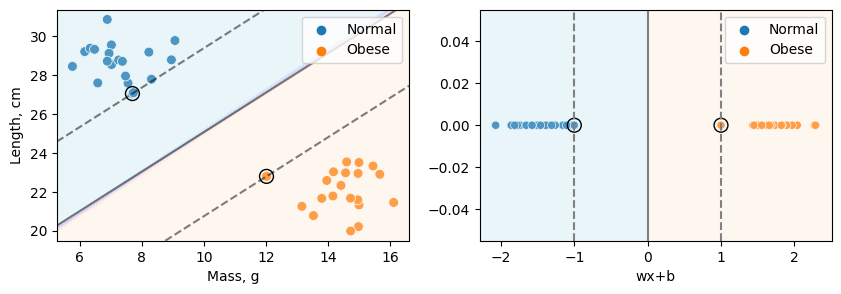

In [ ]:
from sklearn import svm

# Code for illustration, later we will understand how it works
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(x, y)

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

# first fig
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, s=50, ax=axs[0])
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles, ["Normal", "Obese"])
axs[0].set(xlabel="Mass, g", ylabel="Length, cm")

# plot the decision function
delta = 0.5
# create grid to evaluate model
YY, XX = np.meshgrid(
    np.linspace(x[:, 1].min() - delta, x[:, 1].max() + delta, 30),
    np.linspace(x[:, 0].min() - delta, x[:, 0].max() + delta, 30),
)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
pred = np.sign(Z)
axs[0].contourf(XX, YY, pred, alpha=0.3, cmap=custom_cmap)

# plot decision boget_xlimundary and margins
axs[0].contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
axs[0].scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

# second fig
dec_val = clf.decision_function(x)
sns.scatterplot(x=dec_val, y=np.zeros(len(x)), hue=y, ax=axs[1])

x_lim, y_lim = axs[1].get_xlim(), axs[1].get_ylim()
XX, YY = np.meshgrid(
    np.linspace(x_lim[0], x_lim[1], 100), np.linspace(y_lim[0], y_lim[1], 100)
)
pred = np.sign(XX)
axs[1].contourf(XX, YY, pred, alpha=0.3, cmap=custom_cmap)

axs[1].axvline(0, color="grey")
axs[1].axvline(-1, color="grey", ls="dashed")
axs[1].axvline(1, color="grey", ls="dashed")
handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(handles, ["Normal", "Obese"])
axs[1].set(xlabel="wx+b")

sv = clf.decision_function(clf.support_vectors_)
axs[1].scatter(
    sv, np.zeros_like(sv), s=100, linewidth=1, facecolors="none", edgecolors="k"
)
plt.show()

[[video] 📺 Хорошее объяснение SVM](https://www.youtube.com/watch?v=_PwhiWxHK8o)

## 3D классификация

Если мы добавим еще одно измерение — возраст, мы обнаружим, что наши данные стали трехмерными, а разделяет их теперь не линия, а плоскость.

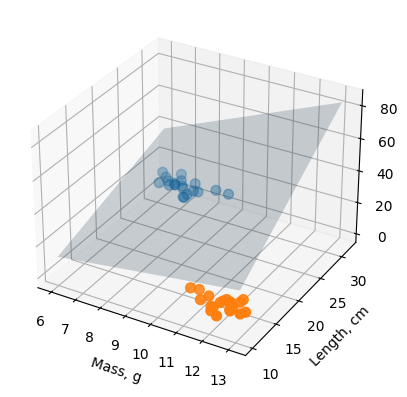

In [ ]:
def generate_3d_data(total_len=40):
    x, y = make_blobs(n_samples=total_len, centers=2, random_state=42, n_features=3)
    x[:, 0] += 10
    x[:, 1] += 20
    x[:, 2] += 10
    return x, y


def plot_data(x, y, total_len=40, s=50, threshold=21.5):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(
        xs=x[:, 0], ys=x[:, 1], zs=x[:, 2], c=y, s=s, cmap="tab10", vmin=0, vmax=9
    )
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    ax.plot_surface(XX, YY, XX * YY * 0.2, alpha=0.2)
    handles, labels = ax.get_legend_handles_labels()
    ax.set(xlabel="Mass, g", ylabel="Length, cm", zlabel="Age, days")
    return ax


total_len = 40
x, y = generate_3d_data(total_len=total_len)
ax = plot_data(x, y, total_len=total_len)

Соответственно, если бы у нас было 4 измерения и больше (например: вес, длина, возраст, кровяное давление), то многомерная плоскость, которая бы разделяла наши классы, называлась бы **гиперплоскость** (рисовать мы ее, конечно же, не будем). Чисто технически, и точка, и линия — тоже гиперплоскости. Но все же гиперплоскостью принято называть то, что нельзя нарисовать на бумаге.

## Многоклассовая классификация

Решение задачи SVM, которое мы рассматривали, касалось задачи бинарной классификации. Мы часто будем работать с несколькими классами.

Есть две основные стратегии расширения задачи SVM классификации с двух классов на несколько:
* **one vs rest** (один против всех): каждый класс отделяется от всех других одной прямой (гиперплоскостью).
* **one vs one** (один против одного): классы попарно отделяются друг от друга прямыми (гиперплоскостями).

Создадим датасет из 4 классов для демонстрации отличий между этими способами.

In [ ]:
centers = [[1, 1], [1, -1], [-1, -1], [-1, 1]]

x, y = make_blobs(n_samples=300, centers=centers, cluster_std=0.50, random_state=42)

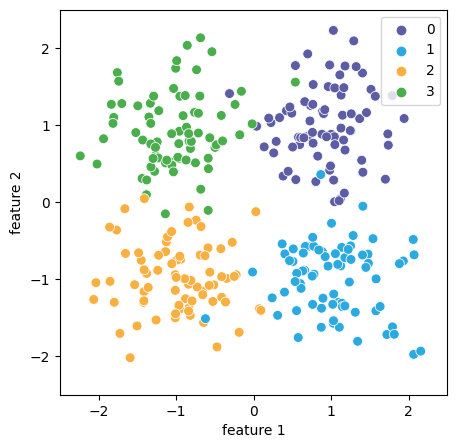

In [ ]:
dark_colors = ["#1B1464", "#0961A5", "#754C24", "#006837"]
bright_colors = ["#5D5DA6", "#2DA9E1", "#F9B041", "#4AAE4D"]
dull_cmap = ListedColormap(["#D1D5ED", "#B8E1EC", "#FEE7D0", "#C9E3C8"])

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# first fig
sns.scatterplot(
    x=x[:, 0], y=x[:, 1], hue=y, s=50, ax=ax, palette=sns.color_palette(bright_colors)
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["0", "1", "2", "3"])
ax.set(xlabel="feature 1", ylabel="feature 2")

plt.xlim([-2.5, 2.5])
plt.ylim([-2.5, 2.5])
plt.show()

### One vs Rest

Классификация **one vs rest** реализована в Sklearn в классе `svm.LinearSVC`:

In [ ]:
clf = svm.LinearSVC()
clf.fit(x, y)

LinearSVC()

Посмотрим, как выглядят разделяющие прямые и нормали к ним для нашей задачи:

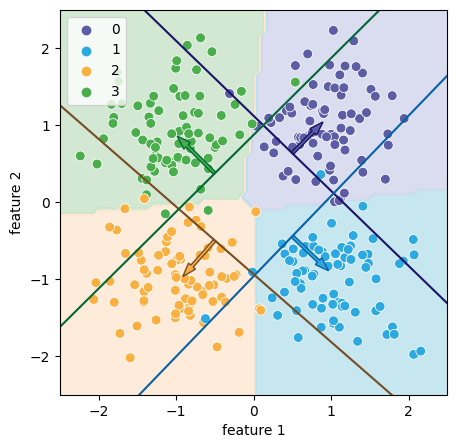

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    x,
    response_method="predict",
    cmap=dull_cmap,
    alpha=0.8,
    xlabel="feature 1",
    ylabel="feature 2",
    ax=ax,
)

# Plot the training points
sns.scatterplot(
    x=x[:, 0], y=x[:, 1], hue=y, s=50, ax=ax, palette=sns.color_palette(bright_colors)
)

# create grid to evaluate model
xx = np.linspace(-2.5, 2.5)
# for visualization
arrow_xs = [0.5, 0.5, -0.5, -0.5]
for i in range(clf.coef_.shape[0]):
    coef = clf.coef_[i]
    w = -coef[0] / coef[1]
    b = -clf.intercept_[0] / coef[1]
    yy = w * xx + b
    # normal
    plt.arrow(
        arrow_xs[i],
        w * arrow_xs[i] + b,
        coef[0] / 4,
        coef[1] / 4,
        edgecolor=dark_colors[i],
        facecolor=bright_colors[i],
        width=0.04,
    )
    # dividing line
    plt.plot(xx, yy, dark_colors[i])

plt.xlim([-2.5, 2.5])
plt.ylim([-2.5, 2.5])

plt.show()

Коэффициенты `clf.coef_` возвращают вектор нормали. С помощью `clf.coef_` и `clf.intercept_` можно записать уравнение разделяющей прямой.

Для 4 классов стратегия **one vs rest** даст 4 разделяющие прямые (гиперплоскости). Количество разделяющих прямых равно количеству классов.

Существует множество модификаций SVM Loss для решения многоклассовой классификации. В литературе вы можете встретить следующую формулировку Loss для SVM задачи:

$$ Loss = \frac{1}{2} ||\vec w||^2 + {1 \over N}\sum_iL_i(f(x_i,W),y_i),$$

$$L_i = \sum_{j\neq y_i}\begin{cases}
  0,  & \mbox{если } s_{y_i}\geq s_j+1\mbox{} \\
  s_j-s_{y_i}+1, & \mbox{если наоборот, то} \mbox{}
\end{cases}=\sum_{j\neq y_i}max(0,s_j-s_{y_i}+1)$$

где $s_j = f(x_i, W)_j$ — уравнение для $j$-го класса, $s_{y_i}$ — значение уравнения для истинного класса.

Идея данной формулы аналогична **one vs rest**, но вместо абсолютных значений используется разница между предсказаниями для различных классов.

Эта формулировка появилась в [Support Vector Machines for Multi-Class Pattern Recognition (J. Weston and C. Watkins, 1999) 🎓[article]](https://www.esann.org/sites/default/files/proceedings/legacy/es1999-461.pdf) и стала популярной благодаря [Стендфорскому курсу 📚[book]](https://cs231n.github.io/linear-classify/#svm), но для нее нет реализации в Sklearn.

Стратегия **one vs rest** позволяет обучать меньшее количество классификаторов, чем **one vs one**, но при **большом количестве классов** могут появляться проблемы, связанные с **сильным дисбалансом классов** при решении задачи “один против всех”. При большом количестве классов лучше использовать **one vs one** стратегию.  

### One vs One

Второй стратегией многоклассовой классификации для SVM является **one vs one**, в которой классы разделяются попарно. Эта стратегия реализована в классе `svm.SVC`.

In [ ]:
clf = svm.SVC(kernel="linear")
clf.fit(x, y)

SVC(kernel='linear')

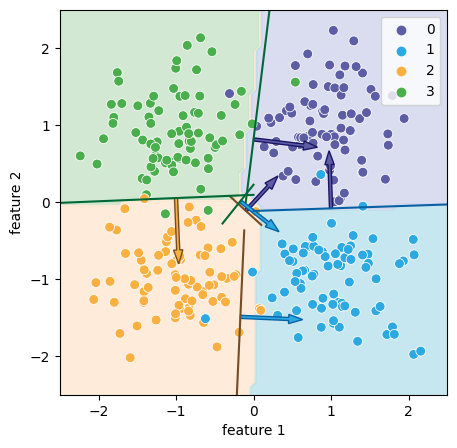

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    x,
    response_method="predict",
    cmap=dull_cmap,
    alpha=0.8,
    xlabel="feature 1",
    ylabel="feature 2",
    ax=ax,
)

# Plot the training points
sns.scatterplot(
    x=x[:, 0], y=x[:, 1], hue=y, s=50, ax=ax, palette=sns.color_palette(bright_colors)
)

# for visualization
arrow_xs = [1, -0.1, 0, -0.17, -0.17, -1]
colors_list = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
range_list = [(0, 2.5), (-0.3, 0.1), (-0.1, 0.5), (-1, -0.12), (-0.4, 0), (-2.5, 0)]

for i in range(clf.coef_.shape[0]):
    xx = np.linspace(*range_list[i])
    coef = clf.coef_[i]
    w = -coef[0] / coef[1]
    b = -clf.intercept_[0] / coef[1]
    yy = w * xx + b
    # normal
    plt.arrow(
        arrow_xs[i],
        w * arrow_xs[i] + b,
        coef[0] / 4,
        coef[1] / 4,
        edgecolor=dark_colors[colors_list[i][0]],
        facecolor=bright_colors[colors_list[i][0]],
        width=0.04,
    )
    # dividing line
    plt.plot(xx, yy, dark_colors[colors_list[i][1]])

plt.xlim([-2.5, 2.5])
plt.ylim([-2.5, 2.5])

plt.show()

Для 4 классов стратегия **one vs one** даст 6 разделяющих прямых (гиперплоскости). Количество разделяющих прямыx:
$$ \frac{n_{classes}\cdot (n_{classes}-1)}{2},$$
гдe $n_{classes}$ — количество классов.

**Практические советы по использованию SVM:**

* SVM делает **геометрическое разделение данных**, поэтому для адекватной работы модели важна **нормализация**.
* В случае **дисбаланса классов** полезно использовать параметры `class_weight` и `sample_weight` ([подробнее 🛠️[doc]](https://scikit-learn.org/stable/modules/svm.html#unbalanced-problems)).
* SVM может давать хорошее решение при небольшом количестве данных, в этом случае стоит попробовать **различные ядра** (про ядра вы узнаете ниже).

# Обобщенные линейные модели

## Полиномиальная модель

Данные не всегда могут быть **хорошо разделены (гипер)плоскостью**. Например, рассмотрим следующее: у нас есть данные по дозировке лекарства и 2 класса — пациенты, которые поправились, и те, которым лучше не стало.

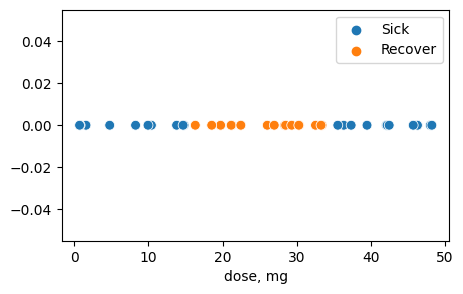

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


def generate_patients_data(total_len=40):
    x = np.random.uniform(0, 50, total_len)
    y = np.zeros_like(x)
    y[(x > 15) & (x < 35)] = 1
    return x, y


def plot_data(x, y, total_len=40, s=50):
    plt.figure(figsize=(5, 3))
    ax = sns.scatterplot(x=x, y=np.zeros(len(x)), hue=y, s=s)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["Sick", "Recover"])
    ax.set(xlabel="dose, mg")
    return ax


total_len = 40
x, y = generate_patients_data(total_len=total_len)
ax = plot_data(x, y, total_len=total_len)
plt.show()

Соответственно, мы не можем найти такое пороговое значение, которое будет разделять наши классы на больных и здоровых, а, следовательно, и Support Vector Classifier работать тоже не будет.  Для начала давайте преобразуем наши данные таким образом, чтобы они стали 2-хмерными. В качестве значений по оси Y будем использовать дозу, возведенную в квадрат (**доза**$^2$).

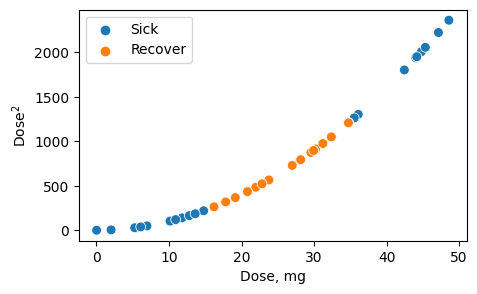

In [ ]:
def plot_data(x, y, total_len=40, s=50):
    plt.figure(figsize=(5, 3))
    ax = sns.scatterplot(x=x[0, :], y=x[1, :], hue=y, s=s)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["Sick", "Recover"])
    ax.set(xlabel="Dose, mg")
    ax.set(ylabel="Dose$^2$")
    return ax


total_len = 40
x_1, y = generate_patients_data(total_len=total_len)
x_2 = x_1**2
x = np.vstack([x_1, x_2])

plot_data(x, y, total_len=40, s=50)
plt.show()

Теперь мы можем вновь использовать Support Vector Classifier для классификации.

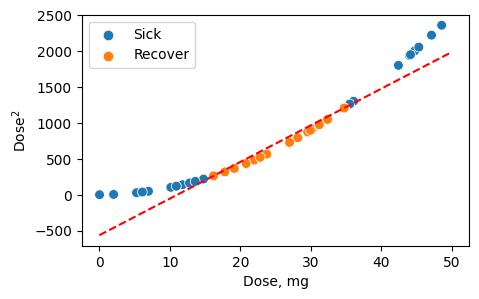

In [ ]:
plot_data(x, y, total_len=40, s=50)

x_arr = np.linspace(0, 50, 50)
xs = [x[0, :][y == 1].min(), x[0, :][y == 1].max()]
ys = [x[1, :][y == 1].min(), x[1, :][y == 1].max()]

# Calculate the coefficients.
coefficients = np.polyfit(xs, ys, 1)

# Let's compute the values of the line...
polynomial = np.poly1d(coefficients)
y_axis = polynomial(x_arr)

# ...and plot the points and the line
plt.plot(x_arr, y_axis, "r--")
plt.show()

## Kernel SVM

Основная идея **Kernel SVM** состоит в том, что **мы можем перейти в пространство большей размерности, в котором данные будут линейно разделимы**.

Но тут возникает резонный вопрос: **почему мы решили возвести в квадрат**? Почему не в куб? Или, наоборот, не извлечь корень? Как нам решить, какое преобразование использовать?

И у нас есть вторая проблема — а если перейти надо в **пространство очень большой размерности**? В этом случае наши данные очень сильно **увеличатся в размере**.

Комбинация двух проблем дает нам много сложности: надо **перебирать большое число возможных пространств большей размерности**.

 ### Обоснование Kernel SVM

Однако основная фишка **Support Vector Machine** состоит в том, что внутри он работает на скалярных произведениях. И можно эти **скалярные произведения** считать, **не переходя в пространство большей размерности**.

Для этого SVM использует **Kernel Function**.


<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/svm_kernel_function.png" width="700">


Выше мы ввели $Loss$ для **Hard Margin Classifier**:

$$\large Loss =  \frac{1}{2} ||\vec w||^2 + \sum_i \alpha_i [y_i ((\vec w, \vec x_i) + b) - 1],$$

где $\alpha_i\geq0$ — множитель Лагранжа. Он будет не равен нулю только для **опорных векторов**.

С добавлением некоторых математических ограничений эту формулу можно [переписать ✏️[blog]](https://www.geeksforgeeks.org/dual-support-vector-machine/) в **дуальной форме**:

$$\large Loss =  \sum_i \alpha_i+ \sum_i \sum_j \alpha_i \alpha_j
y_i y_j (\vec x_i, \vec x_j) = \sum_i \alpha_i+ \sum_i \sum_j \alpha_i \alpha_j
y_i y_j K(\vec x_i, \vec x_j),$$
где $(\vec x_i, \vec x_j)$ — скалярное произведение.

Для получения дуальной формы приравнивают нулю производные $\displaystyle\frac {\partial Loss} {\partial w}$ и $\displaystyle\frac {\partial Loss} {\partial b}$ и подставляют их в исходную формулу.

В этой формуле можно сделать **kernel trick** — заменить **скалярное произведение** на некоторую функцию от двух векторов, которую мы будем называть **Kernel function**.

Важно заметить, что  **дуальная форма** записи для **многоклассовой классификации** возможна только в случае **one vs one**.


### Примеры ядер

Для демонстрации возможностей Kernel SVM создадим датасет, который не разделяется линейными моделями. Для этого воспользуемся функцией `sklearn.datasets.make_circles`.

In [ ]:
from sklearn.datasets import make_circles

x, y = make_circles(n_samples=500, factor=0.3, noise=0.05, random_state=42)

Полученный датасет представляет собой две окружности с разными радиусами и общим центром, относящиеся к разным классам.

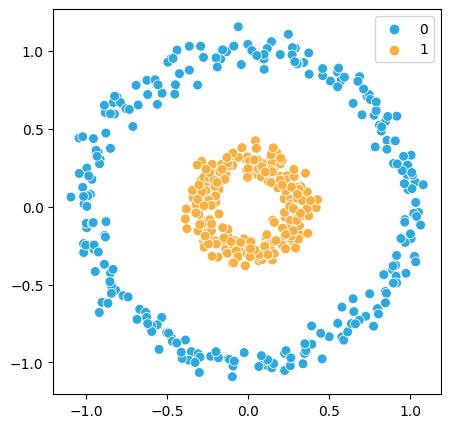

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

sns.scatterplot(
    x=x[:, 0],
    y=x[:, 1],
    hue=y,
    s=50,
    ax=ax,
    palette=sns.color_palette(["#2DA9E1", "#F9B041"]),
)
plt.show()

Напишем функцию визуализации разделяющего правила для SVM модели:

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay


def plot_svm(x, y, clf):
    dull_cmap = ListedColormap(["#B8E1EC", "#FEE7D0"])
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        x,
        response_method="predict",
        cmap=dull_cmap,
        alpha=0.8,
        xlabel="feature 1",
        ylabel="feature 2",
        ax=ax,
    )

    sns.scatterplot(
        x=x[:, 0],
        y=x[:, 1],
        hue=y,
        s=50,
        ax=ax,
        palette=sns.color_palette(["#2DA9E1", "#F9B041"]),
    )
    plt.show()

Первое ядро, которое мы рассмотрим, линейное. Оно задается формулой:
$$\large K(\vec x_i, \vec x_j) = (\vec x_i, \vec x_j)$$

Линейным ядром является скалярное произведение векторов.

Линейное ядро не способно справиться с такой задачей:

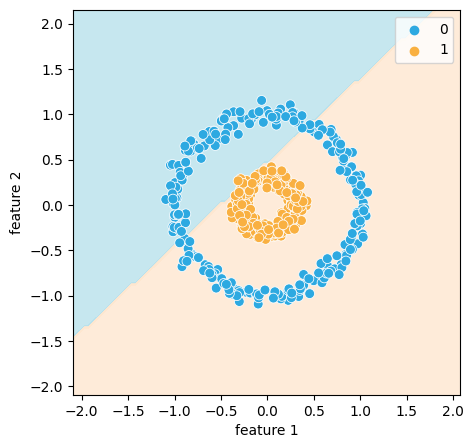

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel="linear")
clf.fit(x, y)
plot_svm(x, y, clf)

Следующее ядро, реализованное в библиотеке Sklearn — полиномиальное, оно задается формулой:
$$K(\vec x_i, \vec x_j) = (\gamma (\vec x_i, \vec x_j)+r)^d,$$
где $d$ — настраиваемый параметр: степень полинома `degree`.

Попробуем применить полиномиальное ядро к нашим данным:

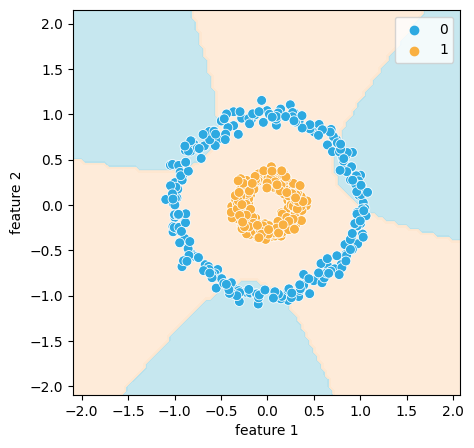

In [ ]:
clf = svm.SVC(kernel="poly")
clf.fit(x, y)
plot_svm(x, y, clf)

Полиномиальное ядро действует не совсем как полиномиальная модель:
$$\large f(\vec wX +b) = (\vec wX +b)^2 = (\vec wX)^2 +2b \vec wX + b^2$$

Kernel SVM не создает новых весов, а перераспределяет веса, которые были у линейной модели.

У модели не получилось разделить данные. Это связано с тем, что значение `degree` по умолчанию равно 3 (хотя если бы мы взяли "честную” полиномиальную модель, нам бы хватило 2-й степени).

Попробуем увеличить степень полинома:

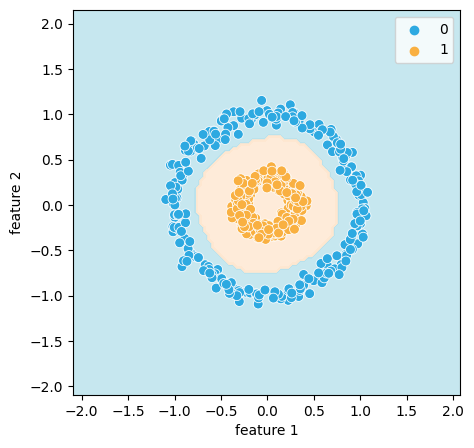

In [ ]:
clf = svm.SVC(kernel="poly", degree=4)
clf.fit(x, y)
plot_svm(x, y, clf)

Вывод который тут стоит сделать: для получения **оптимального результата** бывает полезным **настроить параметры ядра** с учетом даных.

Самым  популярным ядром SVM является ядро радиальных базисных функций RBF, или гауссово ядро. Оно получено из гауссова  распределения, а гауссово распределение характерно для большого количества измеряемых величин. Данное ядро задается формулой:

$$\large K(\vec x_i, \vec x_j) = e^{-\gamma{||\vec x_i - \vec x_j||^2}}$$

Настраиваемыми параметрами модели являются `C` и `gamma`. `C` определяет степень гладкости поверхности принятия решений: чем больше `C`, тем сложнее поверхность и **выше вероятность переобучения** (про переобучение поговорим ниже). `gamma` определяет  влияние одного обучающего примера ([подробнее 🛠️[doc]](https://scikit-learn.org/stable/modules/svm.html#parameters-of-the-rbf-kernel)).

SVM может проверять пространства признаков бесконечного размера, если для такого пространства существует kernel function. RFB ядро как раз [соответствует 📚[book]](https://pages.cs.wisc.edu/~matthewb/pages/notes/pdf/svms/RBFKernel.pdf) такому случаю бесконечномерного пространства признаков.

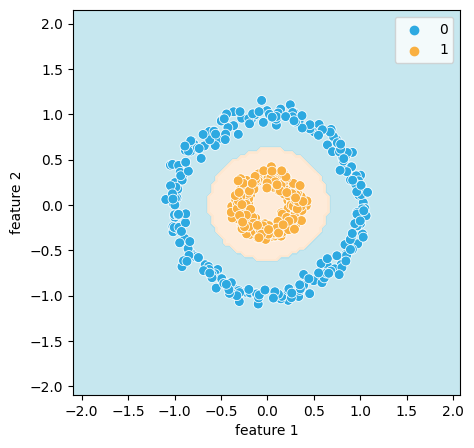

In [ ]:
clf = svm.SVC(kernel="rbf")
clf.fit(x, y)
plot_svm(x, y, clf)

Также в Sklearn реализовано `sigma` ядро. Оно интересно больше с исторической точки зрения, т.к. эквивалентно модели нейрона — Перцептрону, о котором вы узнаете на 5-й лекции. [На практике 🎓[article]](https://home.work.caltech.edu/~htlin/publication/doc/tanh.pdf) оно в большинстве случаев проигрывает RBF ядру.

$$\large K(\vec x_i, \vec x_j) = tanh (\gamma(\vec x_i, \vec x_j)+r)$$

# Практические особенности работы с линейными моделями

## Нормализация данных

Мы уже обсудили, зачем нужна нормализация данных для линейной модели. В данном разделе мы обсудим виды нормализации более подробно.

Загрузим датасет с образцами здоровой и раковой ткани. Датасет состоит из 569 примеров, где каждой строчке из 30 признаков соответствует класс `1` злокачественной (*malignant*) или `0` доброкачественной (*benign*) ткани. Задача состоит в том, чтобы по 30-ти признакам обучить модель определять тип ткани (злокачественная или доброкачественная).


In [ ]:
import sklearn.datasets

cancer = sklearn.datasets.load_breast_cancer()  # load data

x = cancer.data  # features
y = cancer.target  # labels(classes)
print(f"x shape: {x.shape}, y shape: {y.shape}")
print(f"x[0]: \n {x[0]}")
print(f"y[0]: \n {y[0]}")

x shape: (569, 30), y shape: (569,)
x[0]: 
 [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
y[0]: 
 0


Быстрее и удобнее можно посмотреть на данные, используя pandas. К тому же Colab добавил возможность визуализации данных (для этого можно тыкнуть синий значок диаграммы ▆ █ ▄  справа от таблицы):

In [ ]:
import pandas as pd

cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

Colab делает не полную визуализацию признаков, но и на данных изображениях можно найти полезную **информацию о выбросах** (из графика **Values**), **плотности распределений** (из графика **Distributions**) и о наличии **зависимости между переменными** (из графика **2-d distributions**). Например, мы можем увидеть, что значения признаков *mean area* и *mean perimeter* имеют зависимость, близкую к линейной, что не очень хорошо (почему, обсудим позже).

Кроме того, можно тыкнуть на рисунок, посмотреть и скопировать код визуализации, чтобы применить к другим данным или изменить под свои нужды.

Теперь давайте посмотрим на сами данные. У нас есть 569 строк, в каждой из которой по 30 колонок. Такие колонки называют признаками или *features*. Попробуем математически описать все эти признаки (mean, std, min и тд).

In [ ]:
cancer_df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst radius  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       worst texture  worst perimeter   worst area  worst smoothness  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       worst compactness  worst concavity  worst concave points  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       worst symmetry  worst fractal dimension  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

То же самое, но в виде графика. Видно, что у фич совершенно разные диапазоны  значений.

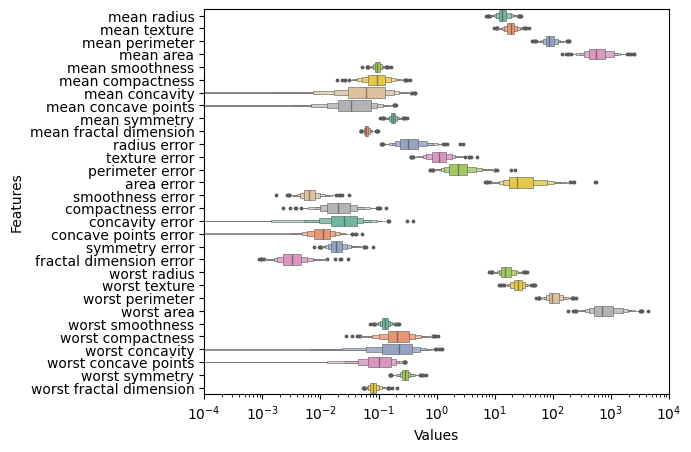

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns


plt.figure(figsize=(6, 5))
ax = sns.boxenplot(
    data=cancer_df,
    orient="h",
    palette="Set2",
    linewidth=0.4,
    flier_kws={"marker": "o", "s": 3},
    line_kws={"linewidth": 1},
)
ax.set(xscale="log", xlim=(1e-4, 1e4), xlabel="Values", ylabel="Features")
plt.show()

Линейная модель представляет собой **сумму взвешенных признаков**. Если мы приведем признаки к **единому масштабу**, мы сможем **оценить их вклад в модель** по значениям весов. Кроме того, работать с признаками в одном диапазоне вычислительно удобно. Для этого будем использовать нормализацию.


### Выбор Scaler

**Нормализацией** называется процедура приведения входных данных к **общим значениям математических статистик**.

Нормализация строит **взаимно однозначное соответствие** между некоторыми размерными величинами (которые измеряются в метрах, килограммах, годах и т. п.) и их безразмерными аналогами. Исходные значения **можно восстановить**, зная статистики оригинальных данных и правило, по которому делалась нормализация.  


Часто используют следующие варианты нормализации:  **`MinMaxScaler`**, **`StandardScaler`**, **`RobustScaler`**.

Идея **`MinMaxScaler`** заключается в том, что он преобразует данные из имеющегося диапазона значений в диапазон от $0$ до $1$. Может быть полезно, если нужно выполнить преобразование, в котором отрицательные значения не допускаются (например, масштабирование RGB пикселей).

$$\large z_i=\frac{X_i-X_{min}}{X_{max}-X_{min}},$$

где $z_i$ — масштабированное значение, $X_i$ — текущее значение, $X_{min}$ и $X_{max}$ — минимальное и максимальное значения имеющихся данных.

Идея **`StandardScaler`** заключается в том, что он преобразует данные таким образом, что распределение будет иметь среднее значение $0$ и стандартное отклонение $1$. Большинство значений будет находиться в диапазоне от $-1$ до $1$. Это стандартная трансформация, и она применима во многих ситуациях.

$$\large z_i=\frac{X_i-u}{s},$$

где $u$ — среднее значение (или $0$ при `with_mean=False`), $s$ — стандартное отклонение (или $0$ при `with_std=False`).

И `StandardScaler`, и `MinMaxScaler` чувствительны к наличию выбросов. **`RobustScaler`** использует медиану и основан на *процентилях*. k-й процентиль — это величина, равная или не превосходящая k процентов чисел во всём имеющемся распределении. Например, 50-й процентиль (медиана) распределения таков, что 50% чисел из распределения не меньше данного числа.

Соответственно, `RobustScaler` не зависит от небольшого числа очень больших предельных выбросов (outliers). Следовательно, результирующий диапазон преобразованных значений признаков больше, чем для предыдущих скэйлеров и, что более важно, примерно одинаков.

$$\large z_i=\frac{X_i-X_{median}}{IQR},$$

где $X_{median}$ — значение медианы, $IQR$ — межквартильный диапазон, равный разнице между 75-ым и 25-ым процентилями.

Сравним `MinMaxScaler`, `StandardScaler`, `RobustScaler` для случайного набора признаков.

In [ ]:
import random

random.seed(0)
random_names = random.sample(list(cancer.feature_names), 8)
cut_df = cancer_df[random_names]

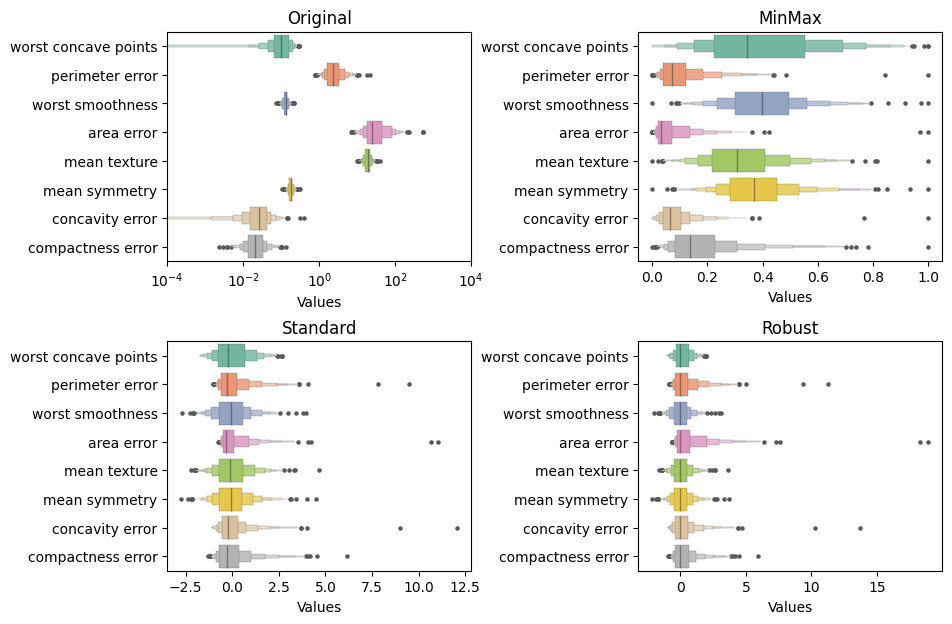

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler


def plot_norm(df, ax, title):
    sns.boxenplot(
        df,
        orient="h",
        palette="Set2",
        ax=ax,
        linewidth=0.2,
        flier_kws={"marker": "o", "s": 5},
        line_kws={"linewidth": 1},
    )
    ax.set(xlabel="Values", title=title)


fig, axs = plt.subplots(2, 2, figsize=(10, 7))

plot_norm(cut_df, axs[0][0], "Original")
axs[0][0].set(xscale="log", xlim=(1e-4, 1e4))

min_max_x = MinMaxScaler().fit_transform(cut_df)
plot_norm(pd.DataFrame(min_max_x, columns=random_names), axs[0][1], "MinMax")

std_x = StandardScaler().fit_transform(cut_df)
plot_norm(pd.DataFrame(std_x, columns=random_names), axs[1][0], "Standard")

rob_x = RobustScaler().fit_transform(cut_df)
plot_norm(pd.DataFrame(rob_x, columns=random_names), axs[1][1], "Robust")

plt.subplots_adjust(wspace=0.55, hspace=0.35)

plt.show()

Перед выбором нормализации важно разобраться с природой выбросов. Для этого на выбросы нужно посмотреть с точки зрения эксперта и попробовать определить, являются ли выбросы ошибкой при сборе данных или редкими случаями, которые необходимо сохранить.

Мы не являемся экспертами в медицине и мало знаем о данных, поэтому будем считать, что наши признаки имеют распределение, близкое к нормальному. Поэтому мы будем использовать `StandardScaler`. `StandardScaler` часто используют как нормировку по умолчанию.

In [ ]:
x_norm = StandardScaler().fit_transform(cancer_df)  # scaled data

Видим, что они стали намного более сравнимы между собой.

In [ ]:
pd.DataFrame(x_norm, columns=cancer.feature_names).describe()

mean radius  mean texture  mean perimeter     mean area  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean  -3.153111e-15 -6.568462e-15   -6.993039e-16 -8.553985e-16   
std    1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%   -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%   -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%    4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max    3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean      6.081447e-15     -1.136369e-15   -2.997017e-16         1.023981e-15   
std       1.000880e+00      1.000880e+00    1.000880e+00         1.000880e+00   
min      -3.112085e+00     -1.610136e+00   -1.114873e+00        -1.261820e+00   
25%      -7.109628e-01     -7.470860e-01   -7.437479e-01        -7.379438e-01   
50%      -3.489108e-02     -2.219405e-01   -3.422399e-01        -3.977212e-01   
75%       6.361990e-01      4.938569e-01    5.260619e-01         6.469351e-01   
max       4.770911e+00      4.568425e+00    4.243589e+00         3.927930e+00   

       mean symmetry  mean fractal dimension  ...  worst radius  \
count   5.690000e+02            5.690000e+02  ...  5.690000e+02   
mean   -1.860648e-15           -1.504752e-15  ... -2.297713e-15   
std     1.000880e+00            1.000880e+00  ...  1.000880e+00   
min    -2.744117e+00           -1.819865e+00  ... -1.726901e+00   
25%    -7.032397e-01           -7.226392e-01  ... -6.749213e-01   
50%    -7.162650e-02           -1.782793e-01  ... -2.690395e-01   
75%     5.307792e-01            4.709834e-01  ...  5.220158e-01   
max     4.484751e+00            4.910919e+00  ...  4.094189e+00   

       worst texture  worst perimeter    worst area  worst smoothness  \
count   5.690000e+02     5.690000e+02  5.690000e+02      5.690000e+02   
mean    1.742016e-15    -1.198807e-15  6.118909e-16     -5.094929e-15   
std     1.000880e+00     1.000880e+00  1.000880e+00      1.000880e+00   
min    -2.223994e+00    -1.693361e+00 -1.222423e+00     -2.682695e+00   
25%    -7.486293e-01    -6.895783e-01 -6.421359e-01     -6.912304e-01   
50%    -4.351564e-02    -2.859802e-01 -3.411812e-01     -4.684277e-02   
75%     6.583411e-01     5.402790e-01  3.575891e-01      5.975448e-01   
max     3.885905e+00     4.287337e+00  5.930172e+00      3.955374e+00   

       worst compactness  worst concavity  worst concave points  \
count       5.690000e+02     5.690000e+02          5.690000e+02   
mean       -2.122887e-15     6.118909e-16         -1.998011e-16   
std         1.000880e+00     1.000880e+00          1.000880e+00   
min        -1.443878e+00    -1.305831e+00         -1.745063e+00   
25%        -6.810833e-01    -7.565142e-01         -7.563999e-01   
50%        -2.695009e-01    -2.182321e-01         -2.234689e-01   
75%         5.396688e-01     5.311411e-01          7.125100e-01   
max         5.112877e+00     4.700669e+00          2.685877e+00   

       worst symmetry  worst fractal dimension  
count    5.690000e+02             5.690000e+02  
mean    -2.422589e-15             2.497514e-15  
std      1.000880e+00             1.000880e+00  
min     -2.160960e+00            -1.601839e+00  
25%     -6.418637e-01            -6.919118e-01  
50%     -1.274095e-01            -2.164441e-01  
75%      4.501382e-01             4.507624e-01  
max      6.046041e+00             6.846856e+00  

[8 rows x 30 columns]

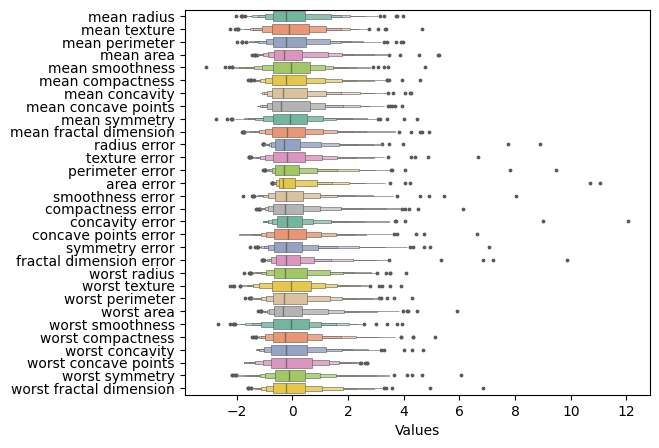

In [ ]:
plt.figure(figsize=(6, 5))
ax = sns.boxenplot(
    data=pd.DataFrame(x_norm, columns=cancer.feature_names),
    orient="h",
    palette="Set2",
    linewidth=0.4,
    flier_kws={"marker": "o", "s": 3},
    line_kws={"linewidth": 1},
)
ax.set(xlabel="Values")
plt.show()

## Проблема корреляции признаков  в случае линейных моделей

Часто может оказаться, что признаковое описание объекта избыточно и между различными признаками имеются связи. Для устойчивости работы линейных моделей важно, чтобы среди признаков не было скоррелированных пар.

Например, если мы будем решать задачу регрессии на наборе признаков $x_1 \dots x_n$, среди которых есть связь $x_2 = 5 x_1$, и возьмём линейную модель вида
$$\large y = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b,$$
то с учётом данной связи мы можем записать:
$$\large y = w_1 x_1 + w_2 (5x_1) + \dots + w_n x_n + b = (w_1 + 5 w_2) x_1 +  w_3 x_3 + \dots + w_n x_n + b.$$

Таким образом, наша модель теперь учитывает признак $x_1$ с одним "общим" весом $(w_1 + 5 w_2)$, несмотря на то, что он закодирован двумя независимыми параметрами. Решение, то есть набор весовых коэффициентов $w_i$, перестало быть единственным, так как мы теперь можем делать произвольные преобразования с числами $w_1$ и $w_2$ до тех пор, пока $(w_1 + 5 w_2)$ остаётся неизменным:

$$(w_1 + 5 w_2) = \{w_1 \rightarrow  w_1 + 5000 ,\, w_2 \rightarrow  w_2 - 1000 \} $$
$$(w_1 + 5 w_2) = \{w_1 \rightarrow  w_1 + 5000000 ,\, w_2 \rightarrow  w_2 - 1000000 \} $$
$$(w_1 + 5 w_2) = \{w_1 \rightarrow  w_1 + 5000000000 ,\, w_2 \rightarrow  w_2 - 1000000000 \} $$
$$(w_1 + 5 w_2) = \{w_1 \rightarrow  w_1 + 5000000000000 ,\, w_2 \rightarrow  w_2 - 1000000000000 \} $$
$$(w_1 + 5 w_2) = \{w_1 \rightarrow  w_1 + Nan ,\, w_2 \rightarrow  w_2 + Nan\}$$

**Чем это плохо?**

В случае корреляции признаков задача не имеет единственного решения и не существует обратной матрицы, обеспечивающей аналитическое решение. Мы можем использовать градиентные методы (поговорим позже) для поиска решения, но
при этом веса модели могут неконтролируемо расти. При этом **суммарный вклад** признаков может быть **мал**.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/carrelation_problem1.png" width="700">

Мы можем оценивать **важность признаков в линейной модели**, используя **веса** перед ними (признаки должны быть нормализованы). Чем больше модуль веса, тем больше вклад. Для коррелированных признаков важность будет переоценена.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/carrelation_problem2.png" width="700">

Кроме того, нужно помнить, что диапазоны числовых переменных ограничены. При неконтролируемом росте весов значение может выйти за диапазон и превратиться в ~~тыкву~~ `Nan`.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/carrelation_problem3.png" width="700">

**Что делать?**

Визуализировать подобные зависимости можно при помощи построения матрицы попарных корреляций признаков:

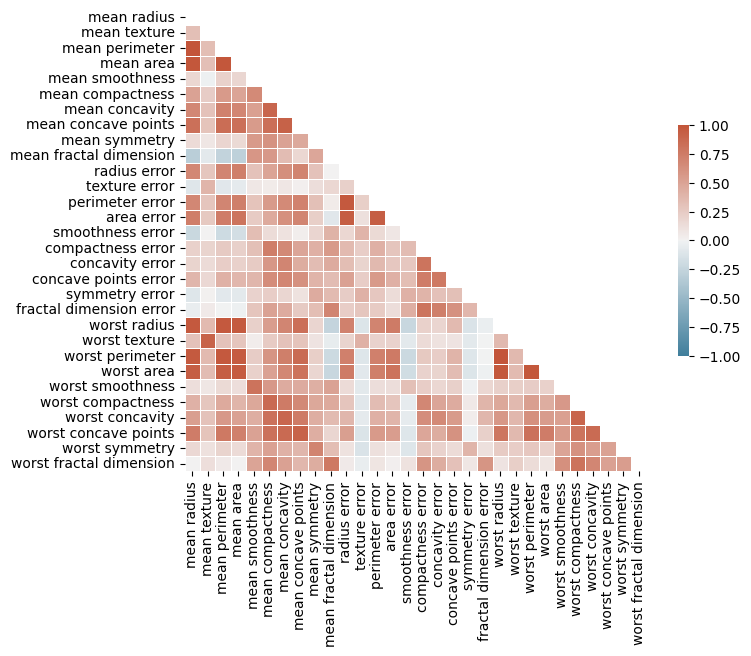

In [ ]:
import numpy as np

cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Compute the correlation matrix
corr = cancer_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)
plt.show()

В наших данных сильно скоррелированы признаки, характеризующие размеры опухоли (мы могли видеть это выше при визуализации 2-d distributions).

В случае корреляции можно:
- **добавить регуляризацию** (о том, что такое регуляризация, мы поговорим дальше);
- **оставить один признак**;
- если есть вероятность, что при удалении признаков часть информации будет потеряна, можно оставить **один признак** неизменным и вычесть его из остальных (оставить только **разницу**). Неинформативные шумовые признаки можно удалить (как это делать, вы узнаете на 4-й лекции).


## Регуляризация

__Сложность модели__ (*model complexity*) — важный гиперпараметр. В частности, для линейных моделей сложность может быть представлена количеством параметров, например, для полиномиальных моделей — степенью полинома.

Сложность модели тесно связана с __ошибкой обобщения__ (_generalization error_). Ошибка обобщения отличается от ошибки обучения, измеряемой на тренировочных данных, тем, что позволяет оценить обобщающую способность модели, приобретенную в процессе обучения, давать точные ответы на неизвестных ей объектах. Cлишком простой модели не будет хватать количества параметров для обобщения сложной закономерности в данных, что приведёт к большой ошибке обобщения. С другой стороны, избыточная сложность модель также приводит к большой ошибке обобщения за счет того, что в силу своей сложности модель начинает пытаться искать закономерности в шуме, добиваясь большей точности на тренировочных данных, теряя при этом часть обобщающей способности.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/model_complexity.png" width="500">

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/l2_regularization.png" width="300">

Параметры модели задают некоторую **аппроксимацию целевой функции**. Аппроксимировать целевую функцию можно несколькими способами, например:
1. Использовать все имеющиеся данные и провести ее строго **через все точки**, которые нам известны ($f1$ на картинке);
2. Использовать более простую функцию (в данном случае, линейную), которая не попадет точно во все данные, но зато будет соответствовать некоторым **общим закономерностям**, которые у них есть ($f2$ на картинке).

Характерной чертой переобучения является первый сценарий, и сопровождается он, как правило, **большими весами**.

Проиллюстрируем описанное явление на примере полиномиальной модели:

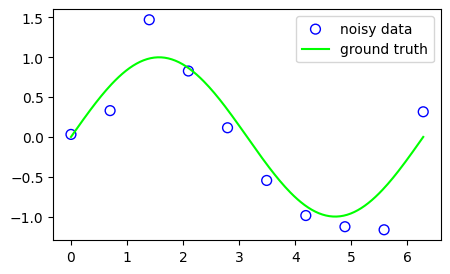

In [ ]:
x = np.linspace(0, 2 * np.pi, 10)
y = np.sin(x) + np.random.normal(scale=0.25, size=len(x))
x_true = np.linspace(0, 2 * np.pi, 200)
y_true = np.sin(x_true)

plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=50, facecolors="none", edgecolors="b", label="noisy data")
plt.plot(x_true, y_true, c="lime", label="ground truth")
plt.legend()
plt.show()

Попробуем аппроксимировать имеющуюся зависимость с помощью полиномиальной модели, используя шумные данные в качестве тренировочных данных:

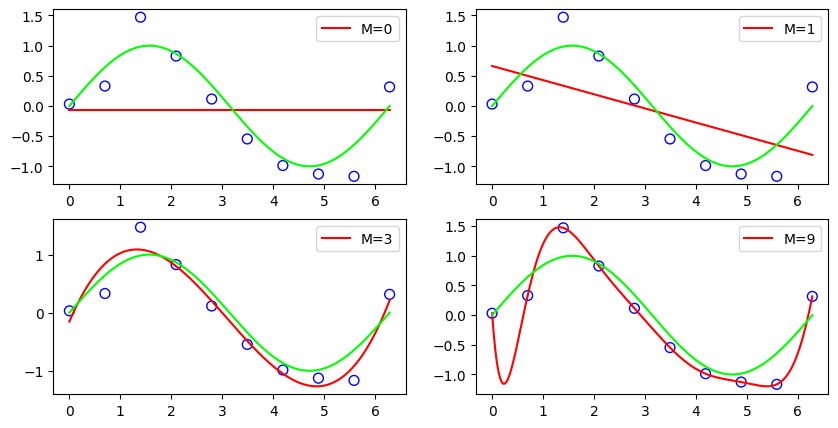

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

x_train = x.reshape(-1, 1)

fig = plt.figure(figsize=(10, 5))

for i, degree in enumerate([0, 1, 3, 9]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    model.fit(x_train, y)
    y_plot = model.predict(x_true.reshape(-1, 1))

    fig.add_subplot(2, 2, i + 1)
    plt.plot(x_true, y_plot, c="red", label=f"M={degree}")
    plt.scatter(x, y, s=50, facecolors="none", edgecolors="b")
    plt.plot(x_true, y_true, c="lime")
    plt.legend()
plt.show()

Видно, что модель может переобучаться, подстраиваясь под тренировочную выборку. В полиноме степень, и, как следствие, количество весов — это гиперпараметр, который можно подбирать на кросс-валидации, однако когда мы таким образом подбираем сложность модели, мы накладываем довольно грубое ограничение на обобщающую способность модели в целом. Вместо этого более разумным было бы оставить модель сложной, но использовать некий ограничитель (__регуляризатор__), который будет заставлять модель отдавать предпочтение выбору более простого обобщения.

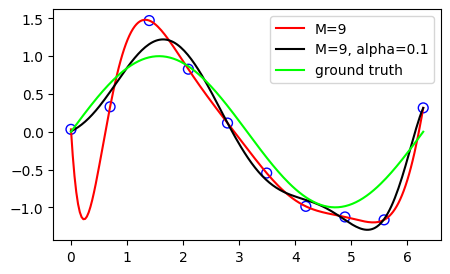

Without regularization:  y = 0.0+-12.11*x+39.41*x^2+-46.31*x^3+28.6*x^4+-10.48*x^5+2.35*x^6+-0.32*x^7+0.02*x^8+-0.0*x^9
With regularization:  y = 0.0+0.37*x+0.52*x^2+0.23*x^3+-0.19*x^4+-0.21*x^5+0.17*x^6+-0.04*x^7+0.01*x^8+-0.0*x^9


In [ ]:
from sklearn.linear_model import Ridge

model = make_pipeline(PolynomialFeatures(9), LinearRegression())
model_ridge = make_pipeline(PolynomialFeatures(9), Ridge(alpha=0.1))

model.fit(x_train, y)
y_plot = model.predict(x_true.reshape(-1, 1))

model_ridge.fit(x_train, y)
y_plot_ridge = model_ridge.predict(x_true.reshape(-1, 1))

plt.figure(figsize=(5, 3))
plt.plot(x_true, y_plot, c="red", label=f"M={degree}")
plt.plot(x_true, y_plot_ridge, c="black", label=f"M={degree}, alpha=0.1")
plt.scatter(x, y, s=50, facecolors="none", edgecolors="b")
plt.plot(x_true, y_true, c="lime", label="ground truth")
plt.legend()
plt.show()

poly_coef = model[1].coef_

eq = f"y = {round(poly_coef[0], 2)}+{round(poly_coef[1], 2)}*x"
for i in range(2, 10):
    eq += f"+{round(poly_coef[i], 2)}*x^{i}"

print("Without regularization: ", eq)

poly_coef = model_ridge[1].coef_

eq = f"y = {round(poly_coef[0], 2)}+{round(poly_coef[1], 2)}*x"
for i in range(2, 10):
    eq += f"+{round(poly_coef[i], 2)}*x^{i}"

print("With regularization: ", eq)

Видно, что одним из "симптомов" переобучения являются аномально большие веса. Модель Ridge Regression, показанная в примере выше, использует L2-регуляризацию для борьбы с этим явлением:

$$L_2 = \alpha \sum_i w_i^2,$$
где $\alpha$ — это коэффициент регуляризации.


 Введение **L2-регуляризации** приводит к тому, что **большие веса больше штрафуются** и предпочтение отдается решениям, использующим **малые значения весов**. При этом модель будет **сохранять скоррелированные и неважные признаки с маленькими весами**.

Это связано с градиентом $L_2$:
$$L'_{2w_i} = 2\alpha w_i$$
Он будет “тянуть” модель в сторону маленьких весов.

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/l1_and_l2_regularization.gif" alt="alttext" width="550"/></center>

Для отбора признаков можно использовать L1-регуляризацию, она больше штрафует маленькие веса.

$$\large L_1 = \alpha \sum_i |w_i|$$
$$\large L_{1w_i}' = \alpha, \text{  где } w_i\neq 0$$

L1 одинаково "штрафует" модель за любые ненулевые веса.



Для получения интуиции, что L1-регуляризация позволяет отбирать признаки, обычно используют картинку ниже.

Голубая область — ограничение на значения весов, которое дает регуляризация.
Для **L2** это **окружность**. Черная точка — это минимальное значение для функции Loss с регуляризацией. Для **L2** она будет лежать **на касательной к окружности**. Для **L1** ограничения на значения весов будут иметь **форму ромба**. При этом минимальное значение для функции Loss с регуляризацией будет чаще попадать в **угол ромба**, что соответствует **обнулению веса** одного из признаков.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/l1_l2_regularization.png" width="1000">

# Вероятностный подход в задаче классификации

## Наивный Байесовский классификатор

Можно построить модель классификатора, которая будет напрямую оценивать вероятность принадлежности объекта к интересующему нас классу просто на основе информации о распределении объектов по классам в обучающей выборке. Базовую идею такого примера легко продемонстрировать на следующих данных.

### Табличные данные: датасет Wine

Загрузим `DataFrame` датасета [Wine 🛠️[doc]](https://archive.ics.uci.edu/ml/datasets/wine), который являлся примером табличных данных в первой лекции:

In [ ]:
import sklearn
from sklearn.datasets import load_wine

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

# Download dataset
features, class_labels = load_wine(
    return_X_y=True, as_frame=True
)  # also we can get data in Bunch (dictionary) or pandas DataFrame

wine_dataset = features
wine_dataset["target"] = class_labels

wine_dataset.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

Датасет содержит объекты 3 различных классов:

In [ ]:
wine_dataset.target.unique()

array([0, 1, 2])

Возьмём первый признак `alcohol`. По имеющийся таблице с данными легко построить функцию распределения $f(x)$, которая будет задавать вероятность $p(\text{alcohol} = x)$, и найти среди наших данных бутылку вина с параметром `alcohol`, равным $x$ (рисунок слева).

Т.к. у нас три класса, мы можем построить распределение объектов в обучающей выборке по признаку `alcohol` отдельно для каждого из этих трёх классов. Эти распределения зададут нам условную вероятность $p(\text{alcohol} = x |\text{target} = i)$ того, что объект имеет значение признака `alcohol`, равное $x$, при условии, что он относится к одному из классов с номером $i$ (рисунок справа).

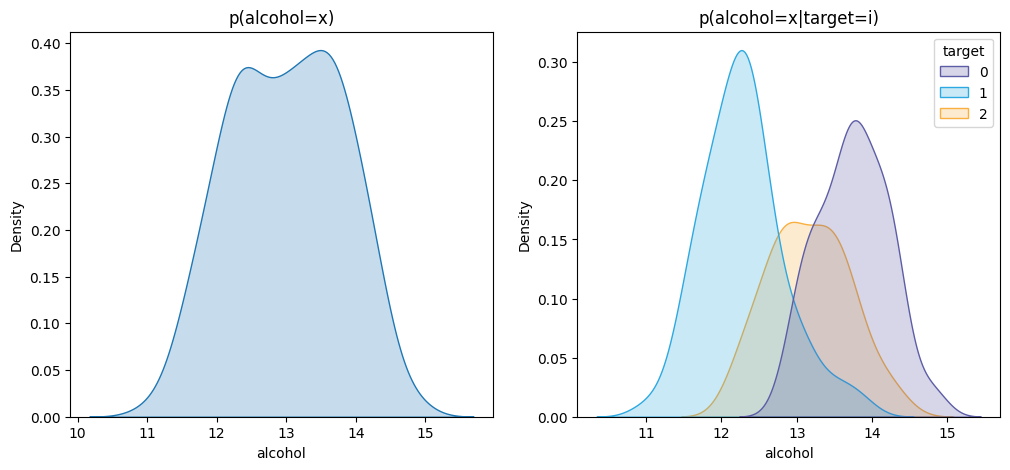

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(wine_dataset, x="alcohol", fill=True, ax=axes[0])
axes[0].set_title("p(alcohol=x)")

sns.kdeplot(
    wine_dataset,
    x="alcohol",
    hue="target",
    palette=sns.color_palette(["#5D5DA6", "#2DA9E1", "#F9B041"]),
    fill=True,
    ax=axes[1],
)
axes[1].set_title("p(alcohol=x|target=i)")
plt.show()

Посмотрев на плотности распределений по классам (рисунок справа), мы можем предположить, что бутылка с значением $\text{alcohol} = 11.3$ будет относиться к 1 классу.

На языке формул наш “метод пристального вглядывания” можно записать с помощью формулы для условной вероятности по [теореме Байеса 📚[wiki]](https://en.wikipedia.org/wiki/Bayes'_theorem):

$$\large p(\text{target} = i | \text{alcohol} = x) = \frac{p(\text{alcohol} = x | \text{target} = i )p(\text{target} = i )}{p(\text{alcohol} = x)},$$

где $p(\text{target} = i)$ — доля объектов класса $i$ в датасете, а $p(\text{target} = i | \text{alcohol} = X)$ — вероятность того, что объект принадлежит классу $i$, при условии того, что признак `alcohol` у него принимает значение $X$.


Мы поняли, откуда в названии метода **Байес**, теперь разберемся, **почему он “наивный”**.

Мы использовали только один признак: `alcohol`. Всего же у нас 13 признаков.

$$\large p(\text{target} = i |\text{features} = \vec x ) = \frac{p(\text{features} = \vec x | \text{target} = i )p(\text{target} = i )}{p(\text{features} = \vec x)}$$

**“Наивность”** Байеса состоит в том, что эта модель будет рассматривать признаки как **независимые случайные величины**:
$$\large p(\text{features} = \vec x)=p(\text{feature}_1 = x_1)\cdotp(\text{feature}_2 = x_2)...(\text{feature}_n = x_n)$$

Если мы решаем задачу классификации на $k$ классов, то для объекта с набором признаком $\vec x$ по формуле выше мы получим $k$ чисел, характеризующих вероятность принадлежности данного объекта к различным классам. Для финального принятия решения нам останется выбрать тот класс, для которого вероятность принадлежности наивысшая:

$$\large \text{prediction} = \underset{i}{\text{argmax}}{\left(p(\text{target} = i |\text{features} = \vec x )\right)}.$$

Вернёмся к нашему датасету Wine и попробуем решить задачу классификации для него при помощи предложенного алгоритма.

Как обычно, разделим наш датасет на тренировочную и валидационную выборки:

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(
    features.values, class_labels.values, test_size=0.25, random_state=42
)

Возьмём реализацию Наивного Байесовского классификатора из [библиотеки Sklearn 🛠️[doc]](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB). Обучим её на тренировочном датасете и измерим качество на отложенной валидационной выборке:

In [ ]:
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB

# Train the model
model = GaussianNB()
model.fit(x_train, y_train)

# Calculate F1_score
pred = model.predict(x_test)
f1_score(y_test, pred, average="macro")

1.0

Благодаря простоте модельного датасета Wine наша наивная статистическая модель показала отличное качество работы. Это связано с “простотой” датасета — признаки классов имеют унимодальные распределения (один пик на плотности распределения), для более сложных данных (многомодальные распределения) такого не будет.

Тем не менее, подход к решению задачи классификации, связанный с построением модели предсказания принадлежности объекта к имеющимся классам, оказался конструктивным.

### NLP: задача определения спама

Наивный Байесовский классификатор часто используют в задаче обнаружения спама, и пример его использования в такой задаче может показаться ещё более наглядным.

В рамках данной задачи у нас имеются:
- Датасет из текстов сообщений с некоторым фиксированным словарём возможных слов.
- Два класса сообщений: спам и нормальное.
- Признаковое описание для каждого сообщения, характеризующее количество вхождений каждого из слов словаря в текст сообщения.


На основе этой информации нам нужно научиться отделять нормальные письма от спама. Все письма состоят из 4-х слов: **‘Добрый’, ‘День’, ‘Гости’, ‘Деньги’**. При этом мы уже посчитали, сколько раз каждое слово встречается в каждом классе.

Мы можем посчитать вероятность встретить слово **‘Добрый’** в нормальном письме: берем количество слов **‘Добрый’** и делим на количество слов во всех нормальных письмах (с повторениями). Аналогично для других слов.

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/naive_bayes_1.png" alt="alttext" width=900/></center>

Делаем то же самое для слов из спама.

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/naive_bayes_2.png" alt="alttext" width=900/></center>

Считаем вероятность того, чтобы письмо было нормальным. Для этого количество нормальных писем делим на общее количество писем. Аналогично для спама. Это $p(\text{target} = i)$ в формуле выше.

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/naive_bayes_3.png" alt="alttext" width=900/></center>

Чтобы получить вероятность нормального письма с фразой **‘Добрый День’** в "наивном" предположении, мы можем перемножить вероятности нормального письма со словом **‘Добрый’** и нормального письма со словом **‘День’**. Это произведение будет $p(\text{target} = i | \text{Features} = \vec X)$ в формуле выше.

Считаем $p(\text{Features} = \vec X|\text{target} = i) p(\text{target} = i)$:

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/naive_bayes_3_5.png" alt="alttext" width=900/></center>

Если вы работаете с NLP, советуем ознакомиться с Latent Dirichlet Allocation:
* [[video] 📺 Latent Dirichlet Allocation (Part 1 of 2)](https://www.youtube.com/watch?v=T05t-SqKArY),
* [[video] 📺 Training Latent Dirichlet Allocation: Gibbs Sampling (Part 2 of 2)](https://www.youtube.com/watch?v=BaM1uiCpj_E).

## Кросс-энтропия как общая функция потерь для задач классификации

### Переход к вероятностям



 ####  Sigmoid
Начнем с задачи бинарной классификации. Линейная модель задается уравнением:
$$s = f(\vec x) = (\vec{w}, \vec{x}) + b$$

Выходы такой модели принимают значения от $-∞$ до $+∞$.

Нам бы хотелось получить на выходе вероятность того, что объект принадлежит к классу $1$. Вероятность принимает значения от $0$ до $1$. Нам нужна функция, которая спроецирует диапазон $(-∞,+∞)$ в диапазон $[0, 1]$.

Такой функцией является сигмоида:
$$p = \sigma(s) = \frac{1}{1+e^{-s}}$$


При $s→-∞$: $p→0$.

При $s→+∞$: $p→1$.

При $s=0$: $p=0.5$.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/scores_to_probability.png" width="700">

Значения $s$ (score) также называют [logit-ом 📚[wiki]](https://en.wikipedia.org/wiki/Logit) (пер. “логарифм”). Это связано с тем, что если выразить logit $s$ через вероятность $p$, то получится формула:
$$s(p) = log \left(\frac{p}{1-p}\right)$$

####SoftMax

[[video] 📺 Объяснение SoftMax от StatQuest](https://www.youtube.com/watch?v=KpKog-L9veg)

В случае многоклассовой классификации мы будем считать по logit-у для каждого класса:
$$\begin{matrix} s_1 = (\vec{w_1}, \vec{x}) + b_1\\ s_2 = (\vec{w_2}, \vec{x}) + b_2\\ ... \\ s_n = (\vec{w_n}, \vec{x}) + b_n \end{matrix}$$

Для непересекающихся классов результатом классификации будет класс, соответствующий наибольшему logit-у.

Предположим, что наша модель выдала следующие значения:

In [ ]:
logits = [[
    5.1,  # cat
    3.2,  # car
    -1.7,  # frog
]]

Тогда, чтобы узнать, какой класс наша сеть предсказала, мы могли бы просто взять `argmax` от наших `logits`:

In [ ]:
import numpy as np

print("Predicted class = %i (Cat)" % (np.argmax(logits, axis=1)))

Predicted class = 0 (Cat)


От argmax нельзя посчитать градиент, так как производная от константы равна 0. Соответственно, если бы мы вставили производную от argmax в градиентный спуск, мы бы получили везде нули, и наша модель бы вообще ничему не научилась.

Кроме того, мы бы хотели получить не logit’ы, а настоящую вероятность $p$ на выходе модели. Да еще и таким образом, чтобы от наших вероятностей можно было посчитать градиент. Для этого мы можем применить к нашим логитам функцию **SoftMax**:
$$\large p(y=k|x=x_i) = \frac{e^{s_k(x_i)}}{\sum_{j=1}^ne^{s_j(x_i)}},$$

где $x_i$ — набор признаков, характеризующий один объект из выборки,
$s_j(x_i)$ — logit для j-го класса для объекта $x_i$.


1. **Вероятности всегда неотрицательны**. Отобразим наши logit’ы на значения $[0, +∞)$.

> Для этого возведем **экспоненту** (число Эйлера $e=2.71828$) **в степень логита**. В результате мы получим вектор гарантированно неотрицательных чисел (положительное число, возведенное в степень, даже отрицательную, даст положительное значение).

2. Классы не пересекаются, **сумма вероятностей** по всем классам **равна единице**.

>  Мы должны их **нормализовать**, то есть поделить на сумму.

Это преобразование называется **SoftMax функцией**. **Получаются вероятности**, то есть числа, которые можно интерпретировать, как вероятности.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/linear_classifier_softmax.png" width="1024">



$\displaystyle \text{SoftMax}_\text{кошка} = \frac{e^{5.1}}{e^{5.1} + e^{3.2} + e^{-1.7}}$

In [ ]:
def softmax(logits):
    return np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)


print(softmax(logits))
print("Sum = %.2f" % np.sum(softmax(logits)))

[[0.86904954 0.12998254 0.00096793]]
Sum = 1.00


Можно обратить внимание, что SoftMax никоим образом не поменял порядок значений. Самому большому logit'у соответствует самая большая вероятность, а самому маленькому, соответственно, самая маленькая.

#### Практическое вычисление SoftMax

При вычислении экспоненты от выходов модели могут получиться очень большие числа в силу очень высокой скорости роста экспоненты. Этот факт необходимо учитывать, чтобы вычисления SoftMax были численно стабильны:

In [ ]:
from warnings import simplefilter

simplefilter("ignore", category=RuntimeWarning)

f = np.array([123, 456, 789])
p = np.exp(f) / np.sum(np.exp(f))
print(f"logits = {f},\nprobabilities = {p}")

logits = [123 456 789],
probabilities = [ 0.  0. nan]


Чтобы регуляризовать вычисление, нам следует предварительно упростить возникающую в вычислении дробь. Для этого мы можем вычесть из каждого $s_i$ положительную константу, чтобы уменьшить значения экспонент. В качестве константы можно выбрать максимальный элемент этого вектора, тогда у нас гарантированно не будет очень больших чисел, и такой способ будет работать более стабильно.

$$M = \max_j s_{j}(x_i),$$
$$s^{new}_{j}(x_i)  = s_{j}(x_i) - M,$$

$$ \dfrac {e^{s^{new}_{k}(x_i)}} {\sum_j e^{s^{new}_{j}(x_i)}}  = \dfrac {e^{s_{k}(x_i) - M }} {\sum_j e^{s_{j}(x_i) - M }} = \dfrac {e^{s_{k}(x_i)}e ^ {-M}} {\sum_j e^{s_{j}(x_i)} e ^ {-M}} = \dfrac {e ^ {-M} e^{s_{k}(x_i)}} {e ^ {-M} \sum_j e^{s_{j}(x_i)} } = \dfrac { e^{s_{k}(x_i)}} { \sum_j e^{s_{j}(x_i)} },$$

где $x_i$ — набор признаков, характеризующий один объект из выборки,
$s_j(x_i)$ — logit для j-го класса для объекта $x_i$.


In [ ]:
f = np.array([123, 456, 789])
f -= f.max()
p = np.exp(f) / np.sum(np.exp(f))
print(f"new logits = {f},\nprobabilities = {p}")

new logits = [-666 -333    0],
probabilities = [5.75274406e-290 2.39848787e-145 1.00000000e+000]


### Cross-entropy


Теперь нам нужно решить, какую функцию потерь использовать. **Вероятности** принимают значения **от $0$ до $1$**. Если мы будем использовать **Hinge loss** или **MSE**, **максимальным значением ошибки** на указанном диапазоне будет **$1$**. А нам хочется **максимально штрафовать** модель, если она выдает **неправильный класс с вероятностью $1$**.

**Cross-entropy / log loss**

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/cross_entropy_plot_loss_with_probability.png" width="800">

Преимуществом Cross-Entropy loss (зеленый) по сравнению с кусочно-гладкой Hinge Loss (оранжевый) являются:
- гладкость и отсутствие участка с плато (не имеет нулевых производных или неопределенных точек),
- большой градиент для большого Loss, маленький вблизи 100% точности (для кусочно гладкой функции градиент ноль или константа).

####  Расстояние (дивергенция) Кульбака — Лейблера:

Чтобы понять, откуда взялась Cross-Entropy, рассмотрим сначала расстояние Кульбака — Лейблера.

В математической статистике и теории информации мерой расхождения между двумя вероятностными распределениями $P$ и $Q$ является расстояние (дивергенция) Кульбака — Лейблера, вычисляемое по формуле:
$$D_{KL}(P||Q) = ∑_i P(i)\log\frac{P(i)}{Q(i)}$$

Попробуем разобраться, что значит эта формула, на примере двух монеток:
- настоящей с вероятностями выпадения орла и решки 0.5 и 0.5 соответственно,
- фальшивой с вероятностями выпадения орла и решки 0.2 и 0.8 соответственно.

Возьмем настоящую монету и произведем 10 бросков (выборок). Получили последовательность $\color{blue}{О О} \color{green}{Р} \color{blue}{О О} \color{green}{Р} \color{blue}{О О О} \color{green}{Р}$, где $\color{blue}{O}$ — это орел, $\color{green}{Р}$ — это решка.
Посчитаем вероятности выбросить такую последовательность для настоящей и фальшивой монеты. Броски независимые, поэтому значения вероятностей перемножаются.

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/kl_divergence_1.png" width="900">

Запишем пропорцию вероятностей данной комбинации для настоящей монетки и для фальшивой (независимые случайные величины, вероятности перемножаются). Для заданных значений вероятностей пропорция будет примерно $149:1$. При пропорции $1:1$ монетки будут идентичны.

$$\frac{\color{blue}{p_1^{N_о}}\color{green}{p_2^{N_р}}}
{\color{blue}{q_1^{N_о}}\color{green}{q_2^{N_р}}}=
\frac{\color{blue}{\left(\frac{1}{2}\right)^{7}}\color{green}{\left(\frac{1}{2}\right)^{3}}}
{\color{blue}{\left(\frac{1}{5}\right)^{7}}\color{green}{\left(\frac{4}{5}\right)^{3}}}\approx \frac{149}{1}$$

Возьмем логарифм от этого значения (это позволит нам избавиться от степеней и заменить умножение сложением) и нормируем на количество бросков монетки $N=\color{blue}{N_о}+\color{green}{N_р}$.

$$\frac{\color{blue}{N_о}}{N}\log{\color{blue}{p_1}}+
\frac{\color{green}{N_р}}{N}\log{\color{green}{p_2}}-
\frac{\color{blue}{N_о}}{N}\log{\color{blue}{q_1}}-
\frac{\color{green}{N_р}}{N}\log{\color{green}{q_2}}$$

При увеличении количества бросков $N\to∞$, так как мы бросали настоящую монетку

$$\frac{\color{blue}{N_о}}{N} \to \color{blue}{p1}, \frac{\color{green}{N_р}}{N} \to \color{green}{p2} .$$

Получаем расстояние Кульбака — Лейблера.

$$D_{KL}(P||Q) = \color{blue}{p_1} \log{\color{blue}{p_1}}
+ \color{green}{p_2}\log{\color{green}{p_2}}
- \color{blue}{p_1}\log{\color{blue}{q_1}}
- \color{green}{p_2}\log{\color{green}{q_2}}$$

$$ = \color{blue}{p_1} \log{\color{blue}{\frac{p_1}{q_1}}}
+ \color{green}{p_2} \log{\color{green}{\frac{p_2}{q_2}}}$$

Посмотрим на разные фальшивые монетки

In [ ]:
def KL_dist(q1, q2, p1=0.5, p2=0.5):
    return p1 * np.log(p1 / q1) + p2 * np.log(p2 / q2)


print(f"q1 = 0.1, q2 = 0.9, Dkl = {KL_dist(0.1, 0.9):0.3f}")
print(f"q1 = 0.2, q2 = 0.8, Dkl = {KL_dist(0.2, 0.8):0.3f}")
print(f"q1 = 0.3, q2 = 0.7, Dkl = {KL_dist(0.3, 0.7):0.3f}")
print(f"q1 = 0.4, q2 = 0.6, Dkl = {KL_dist(0.4, 0.6):0.3f}")
print(f"q1 = 0.5, q2 = 0.5, Dkl = {KL_dist(0.5, 0.5)}")

q1 = 0.1, q2 = 0.9, Dkl = 0.511
q1 = 0.2, q2 = 0.8, Dkl = 0.223
q1 = 0.3, q2 = 0.7, Dkl = 0.087
q1 = 0.4, q2 = 0.6, Dkl = 0.020
q1 = 0.5, q2 = 0.5, Dkl = 0.0


Обратим внимание, что если $P=Q$, то

$$D_{KL}(P||Q) = ∑_i P(i)\log\frac{P(i)}{Q(i)} = 0$$

#### Переход к оценке модели

Мы научились определять близость двух распределений. Как это поможет нам оценить качество модели, если мы знаем, какие метки классов должны получиться?

Пусть $P$ — вероятности истинных меток классов для объекта (1 для правильного класса, 0 для остальных), $Q(\theta)$ — вероятности классов для объекта, предсказанные моделью с обучаемыми параметрами $\theta$.

Расстояние Кульбака — Лейблера между истинными и предсказанными значениями:

$$D_{KL}(P||Q(\theta)) = ∑_i P(i)\log\frac{P(i)}{Q(i| \theta)} =$$

$$ = ∑_i P(i)\log{P(i))} -  ∑_i P(i)\log{Q(i|\theta)} =$$

$$ = - H(P) + H(P|Q(\theta))$$

Мы разбили сумму на две части, первая из которых называется **энтропией** $H(P)$ и не будет зависеть от модели, а вторая называется **кросс-энтропией** $H(P|Q(\theta))$.



#### Энтропия и кросс-энтропия

Понятие энтропии пришло из теории связи. Для расчета энтропии можно использовать формулу Шеннона:

$$H(P)=-\sum^C_{i=1}P(i)\cdot log_{2}(P(i)),$$
где C — количество классов.


В формуле Шеннона не случайно используется логарифм по основанию 2. Она рассчитывает, **сколько бит информации минимально необходимо для передачи одного значения**, например, одного исхода броска монетки.

Если монетка **всегда выдает орел**, то нам нет смысла передавать информацию, чтобы предсказать исход

$$H(\color{blue}{p_1 = 1}, \color{green}{p_2 = 0}) = 0$$


Для настоящей монетки необходимо будет передавать 1 бит информации на бросок
$$H(\color{blue}{p_1 = 0.5},  \color{green}{p_2 = 0.5})= log_{2}(2) = 1,$$

А вот с поддельной монеткой получается интереснее: если сделать много бросков, можно выявить закономерность, что решка выпадет чаще (вероятность трех решек подряд будет больше вероятности одного орла), и за счет этого сократить количество передаваемой информации так, чтобы на один бросок получалось меньше 1 бита. Как это сделать — отдельная область теории информации, называемая **кодирование источника**.
$$H(\color{blue}{q_1 = 0.2}, \color{green}{q_2 = 0.8}) = 0.722$$

__Энтропия__ — мера неуверенности, связанная с распределением $P$.
Зная истинное распределение случайной величины, мы можем рассчитать его энтропию.

Если мы попытаемся использовать статистические данные, полученные для фальшивой монеты $Q$, для настоящей $P$, мы не получим выигрыш в количестве передаваемой информации:

$$H(P||Q) = - \sum^C_{i=1}P(i)\cdot log_2(Q(i)) = 1.322$$

Формула выше называется **кросс-энтропия**.

**Кросс-энтропия** позволяет оценить ситуацию, когда мы аппроксимируем истинное распределение $P$ предсказанным распределением $Q$. Чем больше значения кросс-энтропии, тем больше расхождение между распределениями. Поэтому кросс-энтропию используют в качестве **функции потерь**.




Как мы показали выше, **кросс-энтропия** связана с **энтропией** и **расстоянием Кульбака — Лейблера**
$$H(P||Q) = D_{KL}(P||Q) + H(P).$$

Посчитаем значения для наших монеток с помощью кода:

In [ ]:
# normal coin
p1 = 0.5
p2 = 0.5

# fake coin
q1 = 0.2
q2 = 0.8

In [ ]:
# Kullback–Leibler divergence
div_kl = p1 * np.log2(p1 / q1) + p2 * np.log2(p2 / q2)
print(f"Dkl(P||Q) = {div_kl:.3f}")

# Entropy normal coin
h_p = -p1 * np.log2(p1) - p2 * np.log2(p2)
print(f"H(P) = {h_p:.3f}")

# Entropy fake coin
h_q = -q1 * np.log2(q1) - q2 * np.log2(q2)
print(f"H(Q) = {h_q:.3f}")

# Cross-entropy
h_p_q = -p1 * np.log2(q1) - p2 * np.log2(q2)
print(f"H(P||Q) = {h_p_q:.3f}")
print(f"H(P||Q) = Dkl(P||Q) + H(P) = {h_p+div_kl:.3f}")

Dkl(P||Q) = 0.322
H(P) = 1.000
H(Q) = 0.722
H(P||Q) = 1.322
H(P||Q) = Dkl(P||Q) + H(P) = 1.322


## Расчет функции потерь

Вернемся к задаче классификации изображений. Рассчитаем для предсказания модели Cross-Entropy loss.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/logits_to_scores_to_probabilitys.png" width="900">

На картинке на входе был изображен кот. Метки классов преобразуются следующим образом:
$$ y_i = \begin{cases} 1 & \text{для i=k, где k - номер истинного класса}, \\0 & \text{для любого } i\neq k.
 \end{cases}$$
Таким образом
$$ y = [1, 0, 0]$$

То есть **в расчете Loss** мы будем использовать только **вероятность истинного класса**.

В расчетах выше мы использовали логарифм по основанию 2, что приближало нас к теории информации. Мы можем считать кросс-энтропию по натуральному логарифму, она будет отличаться умножением на константу.

$$H(P||y)= - \sum^C_{i=1}y_i\cdot log(p_i) = -1⋅\log{0.87}-0\cdot\log{0.13}-0\cdot\log{0.001} = - \log(p_{cat}) = - \log{0.87} \approx0.14$$

In [ ]:
def cross_entropy_loss(pred_prob, true_prob):
    return np.sum(-true_prob * np.log(pred_prob))/pred_prob.shape[0]

# 3 classes 2 items
logits = np.array([
    [5.1, 3.2, -1.7], # one item
   #[2.1, 6.3, 1.5],  # second item
])

print(f"Logits = \n{logits}\n")

pred_prob = softmax(logits)
print(f"Predicted Probabilities = \n{pred_prob}\n")

# 3 classes 2 items
true_prob = np.array([
    [1.0, 0.0, 0.0],  # one item
   #[0.0, 1.0, 0.0],  # second item
])
print(f"True Probabilities = \n{true_prob}\n")

print(f"Cross-entropy loss = {cross_entropy_loss(pred_prob, true_prob):.3f}")

Logits = 
[[ 5.1  3.2 -1.7]]

Predicted Probabilities = 
[[0.86904954 0.12998254 0.00096793]]

True Probabilities = 
[[1. 0. 0.]]

Cross-entropy loss = 0.140


### Градиент функции потерь. Кросс-энтропия




Итоговая последовательность преобразований будет выглядеть так:

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L02/out/linear_model_probability_pipeline.png" width="1000">

[[blog] ✏️ Cross-Entropy Loss](https://wandb.ai/wandb_fc/russian/reports/---VmlldzoxNDI4NjAw)

Посчитаем производную от функции ошибок. Функция ошибок:

$$ L = - \sum_i y_i \log p_i = -\sum_i y_i \log(\dfrac {e^{s_{y_i}}} {\sum_j e^{s_{y_j}}}),$$

где $s_{y_i}$ — это логиты классов, получаемые из линейной модели:

$$s_{y_i} = w_i x$$

Для расчета градиента будем использовать chain rule:

$$ \dfrac {\partial L} {\partial w_i} = \dfrac {\partial L} {\partial s_{y_i}} \dfrac {\partial s_{y_i}} {\partial w_i} $$

Градиент логитов по весам:

$$\dfrac {\partial s_{y_i}} {\partial w_i} = x$$

У нас только одна истинная метка класса $y_k = 1$, для $i\neq k$ $y_i=0$

$$ L = -y_k \log p_k = - \log(\dfrac {e^{s_{y_k}}} {\sum_j e^{s_{y_j}}})$$



У нас два случая:
1. **производная по истинному логиту** (значение логита входит в числитель и знаменатель дроби)
2. **производная по остальным логитам** (значение логита входит только в знаменатель дроби).

Начнем с истинного логита:
1. Производная по $s_{y_k}$. Вынесем минус, чтобы не потерять:

$$ -L = \log(\dfrac {e^{s_{y_k}}} {\sum_j e^{s_{y_j}}}) = \log e^{s_{y_k}} - \log  \sum_j e^{s_{y_j}}  = s_{y_k} - \log  \sum_j e^{s_{y_j}}$$

$$\dfrac {\partial -L} {\partial s_{y_k}} = 1 - \dfrac 1 {\sum_j e^{s_{y_j}}} \cdot \dfrac {\partial {\sum_j e^{s_{y_j}}}} {\partial s_{y_k}} = 1 - \dfrac 1 {\sum_j e^{s_{y_j}}} \cdot \dfrac {\partial e^{s_{y_k}}} {\partial s_{y_k}} = 1 - \dfrac {e^{s_{y_k}}} {\sum_j e^{s_{y_j}}} = 1 - p_k$$

Вспомним про минус:

$$\dfrac {\partial L} {\partial s_{y_j}} = p_k - 1 $$

2. Для остальных логитов $i \neq k$. Вынесем минус, чтобы не потерять:

$$ -L = \log(\dfrac {e^{s_{y_i}}} {\sum_j e^{s_{y_j}}}) = \log e^{s_{y_k}} - \log  \sum_j e^{s_{y_j}}  = s_{y_k} - \log  \sum_j e^{s_{y_j}}$$

$$\dfrac {\partial -L} {\partial s_{y_i}} = - \dfrac 1 {\sum_j e^{s_{y_j}}} \cdot \dfrac {\partial {\sum_j e^{s_{y_j}}}} {\partial s_{y_i}} =  \dfrac 1 {\sum_j e^{s_{y_i}}} \cdot \dfrac {\partial e^{s_{y_i}}} {\partial s_{y_i}} = \dfrac {e^{s_{y_i}}} {\sum_j e^{s_{y_j}}} = - p_i$$

Вспомним про минус:

$$\dfrac {\partial L} {\partial s_{y_j}} = p_i $$

Получаем:
$$ \dfrac {\partial L} {\partial s_{y_i}}  =  \begin{cases} p_i - 1 & \text{для i=k, где k - номер истинного класса}, \\p_i & \text{для любого } i\neq k.
 \end{cases} $$

Применим **chain rule**:

$$ \dfrac {\partial L} {\partial w_i}  = \dfrac {\partial L} {\partial s_{y_i}} \dfrac {\partial s_{y_i}} {\partial w_i}  =  \begin{cases}(p_i - 1)x & \text{для i=k, где k - номер истинного класса}, \\p_ix & \text{для любого } i\neq k.
\end{cases} $$

В коде это будет выглядеть вот так:

In [ ]:
# Input batch of 2 vector with 4 elements
x = np.array([
    [1, 2, 3, 4],
    [1, -2, 0, 0]
])
# Weights
W = np.random.randn(3, 4)  # 3 class

# model output
logits = x.dot(W.T)
print("Scores(Logits) \n", logits, "\n")

# Probabilities
probs = softmax(logits)  # defined before
print("Probs \n", probs, "\n")

# Ground true classes
y = [0, 1]

# Derivative
dl_ds = probs.copy()
dl_ds[np.arange(len(y)), y] += -1  # substract one from true class prob
dW = x.T.dot(dl_ds)  # dot product with input

print("Grads dL/dW \n", dW)  # have same shape as W

Scores(Logits) 
 [[-1.83503357  1.34297936  8.0008737 ]
 [ 0.03926955 -1.67315842  0.40267293]] 

Probs 
 [[5.34243609e-05 1.28213223e-03 9.98664443e-01]
 [3.81877168e-01 6.89010238e-02 5.49221809e-01]] 

Grads dL/dW 
 [[-6.18069408e-01 -9.29816844e-01  1.54788625e+00]
 [-2.76364749e+00  1.86476222e+00  8.98885270e-01]
 [-2.99983973e+00  3.84639669e-03  2.99599333e+00]
 [-3.99978630e+00  5.12852892e-03  3.99465777e+00]]


<font size="6">Литература:</font>

<font size="5">Линейная регрессия</font>

* [[book] 📚 Метрики классификации и регрессии](https://academy.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii)
* [[blog] ✏️ Стратификация данных в задаче регрессии (недоступно в РФ)](https://medium.com/@nlztrk/stratification-on-regression-problems-e36b3b866079), [код](https://datascience.stackexchange.com/questions/33140/stratify-on-regression)

<font size="5">Метод градиентного спуска</font>
* [[book] 📚 Градиентный спуск](https://www.tomasbeuzen.com/deep-learning-with-pytorch/chapters/chapter1_gradient-descent.html)
* [[book] 📚 Стохастический градиентный спуск](tomasbeuzen.com/deep-learning-with-pytorch/chapters/chapter2_stochastic-gradient-descent.html)

<font size="5">SVM</font>
* [[video] 📺 Хорошее объяснение SVM](https://www.youtube.com/watch?v=_PwhiWxHK8o)
* [[book] 📚 SVM на стэнфордском курсе ](https://cs231n.github.io/linear-classify/#svm)

<font size="5">Обобщенные линейные модели</font>
* [[blog] ✏️ Дуальная форма SVM](https://www.geeksforgeeks.org/dual-support-vector-machine/)
* [[git] 🐾 Продвинутый алгоритм, основанный на SVM](https://github.com/IvanoLauriola/MKLpy)

<font size="5">Вероятностный подход в задаче классификации</font>
* [[video] 📺 Naive Bayes in NLP](https://www.youtube.com/watch?v=O2L2Uv9pdDA)
* Latent Dirichlet Allocation:
 * [[video] 📺 Latent Dirichlet Allocation (Part 1 of 2)](https://www.youtube.com/watch?v=T05t-SqKArY),
 * [[video] 📺 Training Latent Dirichlet Allocation: Gibbs Sampling (Part 2 of 2)](https://www.youtube.com/watch?v=BaM1uiCpj_E).
* [[video] 📺 Объяснение SoftMax от StatQuest](https://www.youtube.com/watch?v=KpKog-L9veg)
* [[video] 📺 Объяснение KL Divergence](https://www.youtube.com/watch?v=SxGYPqCgJWM)
* [[blog] ✏️ Расчет Cross-Entropy в задаче классификации (недоступно в РФ)](https://towardsdatascience.com/cross-entropy-for-classification-d98e7f974451)